In [1]:
import requests
import csv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Data Extraction Demo

In [2]:
import facebook
import json
import requests
from selenium import webdriver
from time import sleep

# FaceBook Graph Api Data Extraction
# Movies,Music,Books
# This Part automatically login to specified email address and get data
# manual intervention needed

user_email='smdmprojectuser3@protonmail.com'
user_password='project789!@#'
access_token="EAACEdEose0cBAMXrNOdOOjXApnaNbMCz16Nvj4xL5ZCSiwL6jHyD2ZBtzPgiS36D54lVTGyFqDcBW2J069dZCovUcCv6sANlYSLR1K9stv810ISCrS9YA14MtHQZCuIvmKDaCa5Ne6jT2sQrYRq8LU6WvIBdmlVZBTZBJqu9GngQspGLg2ekZAUfv5235BfgSydZBsv0HaZACHAdIMIoXnh6U"

ACCESS_TOKEN=access_token
user_email=user_email
user_password=user_password

# For this you will have to put path Accoding to your PC. chromedriver file is in project folder
path_chrome_driver="/Users/srjiwtod/Downloads/chromedriver.exe"

 
driver = webdriver.Chrome(path_chrome_driver)
driver.get('https://www.facebook.com/')


 
username_box = driver.find_element_by_id('email')
username_box.send_keys(user_email)
print ("Email Id entered")

 
password_box = driver.find_element_by_id('pass')
password_box.send_keys(user_password)
print ("Password entered")
 
login_box = driver.find_element_by_id('loginbutton')
login_box.click()
 
print (" Congrats logged into Fcaebook")
input('Press anything to view result')
driver.quit()
print("Finished")

gapi = facebook.GraphAPI(ACCESS_TOKEN)
profile={}
profile = gapi.get_object("me")

friends = gapi.get_connections("me", "friends")

likes = gapi.get_connections("me", "likes")

books = gapi.get_connections("me", "books")

music = gapi.get_connections("me", "music")

movies = gapi.get_connections("me", "movies")

print("******************Friends************************")
print(friends)


print("******************Books************************")
#print(books)
booksList = books['data']
booksNames =[]
for value in booksList:
    booksNames.append(value['name'])
print(booksNames)


print("******************Music************************")
#print(music)
musicList = music['data']
musicNames =[]
for value in musicList:
    musicNames.append(value['name'])
print(musicNames)


print("******************Movies************************")
#print(movies)
moviesList = movies['data']
moviesNames =[]
for value in moviesList:
    moviesNames.append(value['name'])
print(moviesNames)

Email Id entered
Password entered
 Congrats logged into Fcaebook
Press anything to view result
Finished


GraphAPIError: Error validating access token: This may be because the user logged out or may be due to a system error.

# Data from user profile

In [3]:
#These are movies,music,books that we have extracted
# The inputdata is low because of computation time and hardware required 

# Warning project takes atleast 15mins for all the computation and results


moviesNames={'Heat','American Sniper','GoldenEye','Sniper'}
booksNames={'False Impressions','God Created the Integers','Prisoner of Birth'}
musicNames={'Soul Deep','Misty Mountains','Now I Got A Woman'}

# Movie Recommendation Core

In [4]:


def movieRecommendations(title):
    linkdict={}
    z=[]
    d={}
    
    #column headers for the dataset
    item_cols = ['movieid','title','genres']
    link_cols = ['movieid','imdbid','tmdbid']
    
    #reading the csv file
    users = (pd.read_csv('movies.csv',names=item_cols,nrows=1000) )
    links=(pd.read_csv("links.csv",names=link_cols,nrows=1000))
    x=users.movieid.tolist()
    y=users.genres.tolist()
    x1=links.movieid.tolist()
    y1=links.tmdbid.tolist()
    
    
    for i in range(0,len(x1)):
        linkdict[x1[i]]=y1[i]
        
    
    
    for i in range(0,len(y)):
        z=y[i].split("|")
        y[i]=z
        z=[]
        
    
    for i in range(0,len(x)):
        if "(no genres listed)" in y[i]:
            y[i]=[]   
            
        if(math.isnan(y1[i])):
            y1[i]=0
        d[x[i]]=[y[i],int(y1[i])]
          
    
    
    for i in range(0,len(x)):
        genlist=list(d[x[i]])
        
        genstr=" ".join(str(x) for x in genlist[0])
        d[x[i]].append(genstr)
    
    veclist=list(d.values())
    for i in range(0,len(veclist)):
        veclist[i]=veclist[i][2]

    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(veclist)

    cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
    indices=pd.Series(users.index,index=users['title'])
    
    
   
    index_ = indices[title]
    sim_scores_ = list(enumerate(cosine_sim2[index_]))
    if i!=0:
        df = pd.DataFrame(sim_scores_, columns=['word', 'frequency'])
        df.plot(kind='bar', x='word',figsize=(100,100))
    sim_scores_ = sorted(sim_scores_, key=lambda x: x[1], reverse=True)
    sim_scores_=sim_scores_[1:10]
    if i==1:
        i=i-1
    movie_indices=[i[0] for i in sim_scores_]
    return users['title'].iloc[movie_indices]
    
moviesNames={'Heat','American Sniper','GoldenEye','Sniper'}


# Book Recommendation Core


In [5]:
def bookRecommendations(title):
    mergeList={}
    #column headers for the dataset
    items_cols=['title','author','genre','height','publisher']
    #reading the csv file
    users=(pd.read_csv('books.csv',names=items_cols,skiprows=[0]))
    titleList=users.title.tolist()
    authorList=users.author.tolist()
    genreList=users.genre.tolist()
    heightList=users.height.tolist()
    publisherList=users.publisher.tolist()
    cleanedPublisherList=[x for x in publisherList if str(x)!='nan']
    for i in range(0,len(cleanedPublisherList)):
        mergeList[i]=genreList[i]+' '+cleanedPublisherList[i]
    vecList=list(mergeList.values())
    
    if isinstance(vecList, list):
        [str.lower(i.replace("_", " ")) for i in vecList]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(vecList, str):
            str.lower(vecList.replace(" ", ""))
        
        
    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(vecList)  
    cosine_sim2=cosine_similarity(count_matrix,count_matrix)
    indices=pd.Series(users.index,index=users['title'])
    index_=indices[title]
    sim_scores_=list(enumerate(cosine_sim2[index_]))
    df = pd.DataFrame(sim_scores_, columns=['word', 'frequency'])
    df.plot(kind='bar', x='word',figsize=(100,100))
    sim_scores_ = sorted(sim_scores_, key=lambda x: x[1], reverse=True)
    sim_scores_=sim_scores_[1:11]
    book_indices=[i[0] for i in sim_scores_]
    return users['title'].iloc[book_indices]

booksNames={'False Impressions','God Created the Integers','Prisoner of Birth'}

# Book Recommendation Core

In [6]:
def songRecommendations(title):
    mergeList={}
    #column headers for the dataset
    item_cols = ['title','genre','year']
    
    #reading the csv file
    users = (pd.read_csv('music.csv',names=item_cols))
    titleList=users.title.tolist()
    genreList=users.genre.tolist()
    yearList=users.year.tolist()
    
    for i in range(0,len(genreList)):
        mergeList[i]=str(genreList[i])+' '+str(yearList[i])
    
    vecList=list(mergeList.values())
    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(vecList)
    
    cosine_sim2=cosine_similarity(count_matrix,count_matrix)
    indices=pd.Series(users.index,index=users['title'])
    
    index_=indices[title]
    sim_scores_=list(enumerate(cosine_sim2[index_]))
    df = pd.DataFrame(sim_scores_, columns=['word', 'frequency'])
    df.plot(kind='bar', x='word',figsize=(100,100))
    sim_scores_ = sorted(sim_scores_, key=lambda x: x[1], reverse=True)
    sim_scores_=sim_scores_[1:11]
    music_indices=[i[0] for i in sim_scores_]
    return users['title'].iloc[music_indices]

musicNames={'Soul Deep','Misty Mountains','Now I Got A Woman'}

# #Recommendation Core

In [7]:
def getRecommendations():
    finalMovieList=[]
    finalBooksList=[]
    finalSongsList=[]
    
    print("Recommendaion engine started.......");
    print("Wait for done statement");

    lst=[]
    i=1
    for movie in moviesNames:
        finalMovieList.append(movieRecommendations(movie))
        
        
    i=1
    for book in booksNames:
        finalBooksList.append(bookRecommendations(book))
    
    i=1
    for music in musicNames:
        finalSongsList.append(songRecommendations(music))
    
    print(finalMovieList)
    print(finalBooksList)
    print(finalSongsList)
    
    print("Done");
    return
    

# User Interface

In [8]:
from ipywidgets import widgets
from IPython.display import display

Click button to get recommendations


Button(button_style='success', description='Get Recommendations', style=ButtonStyle())

Recommendaion engine started.......
Wait for done statement
[93           Broken Arrow (1996)
430           Cliffhanger (1993)
490    Executive Decision (1996)
543    Surviving the Game (1994)
721             Rock, The (1996)
821        Chain Reaction (1996)
972          Maximum Risk (1996)
168               Hackers (1995)
460           Hard Target (1993)
Name: title, dtype: object, 22                                      Assassins (1995)
163                    Die Hard: With a Vengeance (1995)
183                                      Net, The (1995)
285                          Natural Born Killers (1994)
475                                Judgment Night (1993)
586                                        Batman (1989)
77                            Crossing Guard, The (1995)
168                                       Hackers (1995)
290    Léon: The Professional (a.k.a. The Professiona...
Name: title, dtype: object, 616         Modern Affair, A (1995)
631           Jack and Sarah (1995)
8

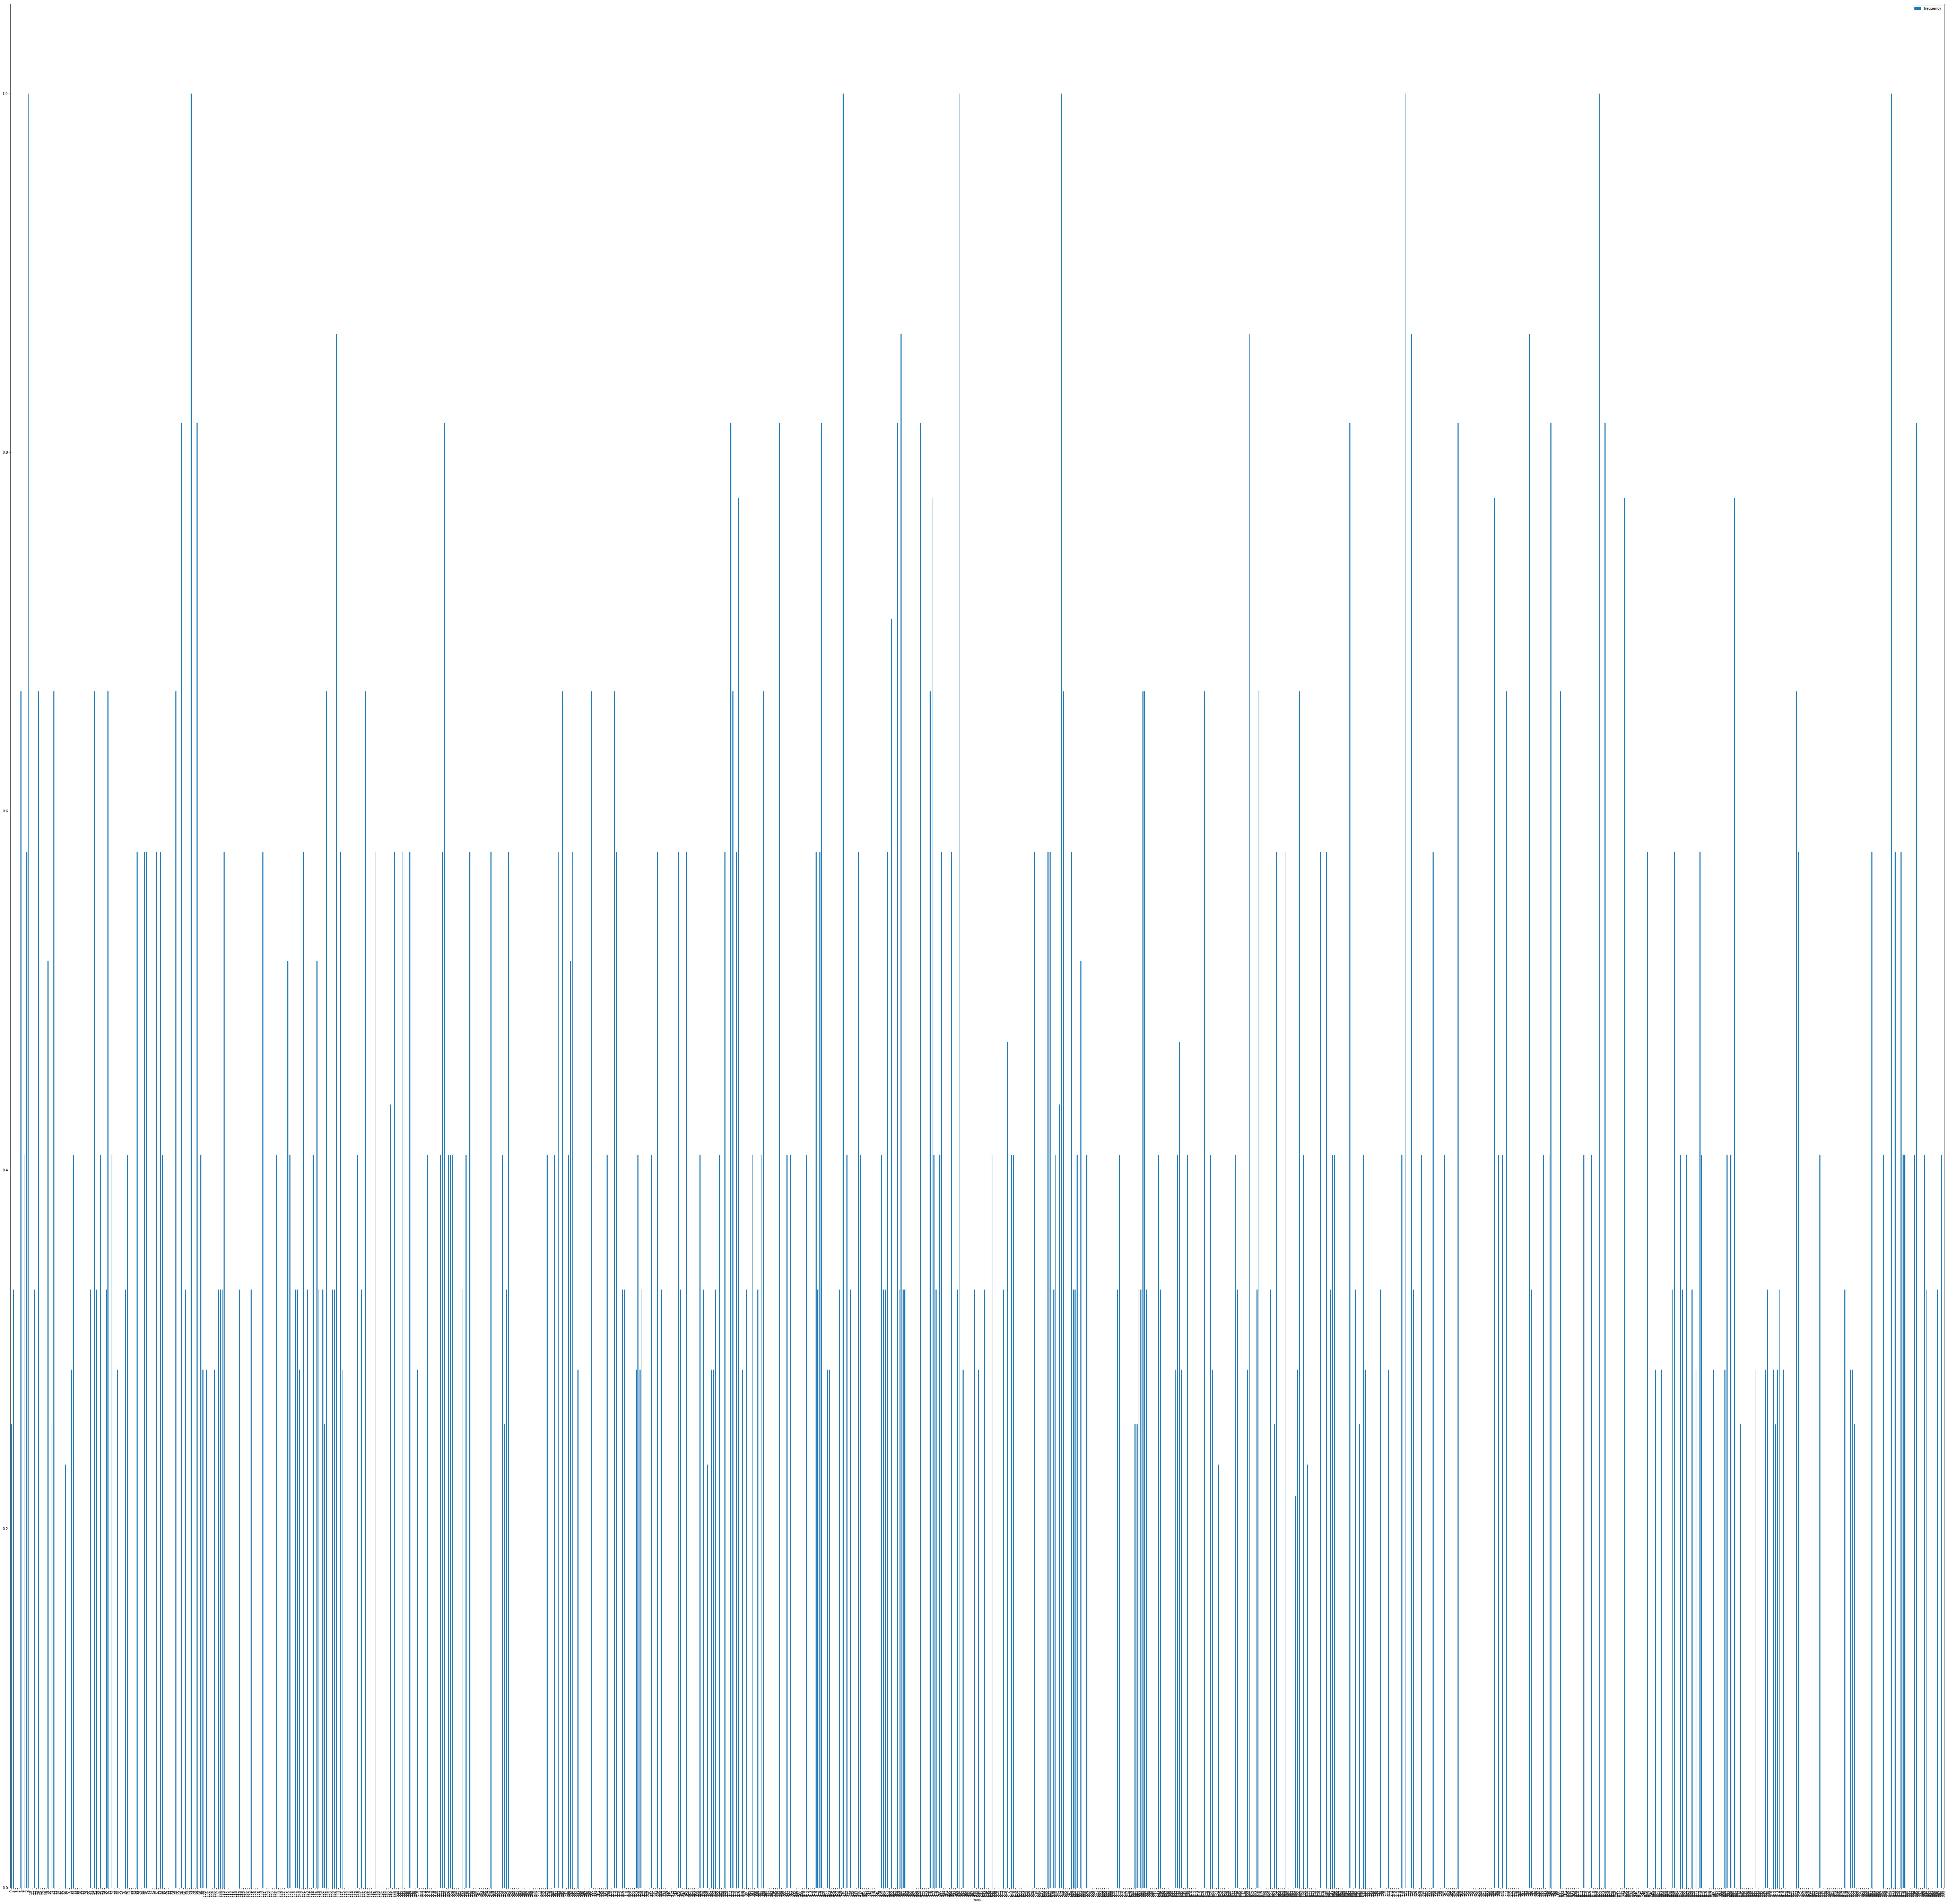

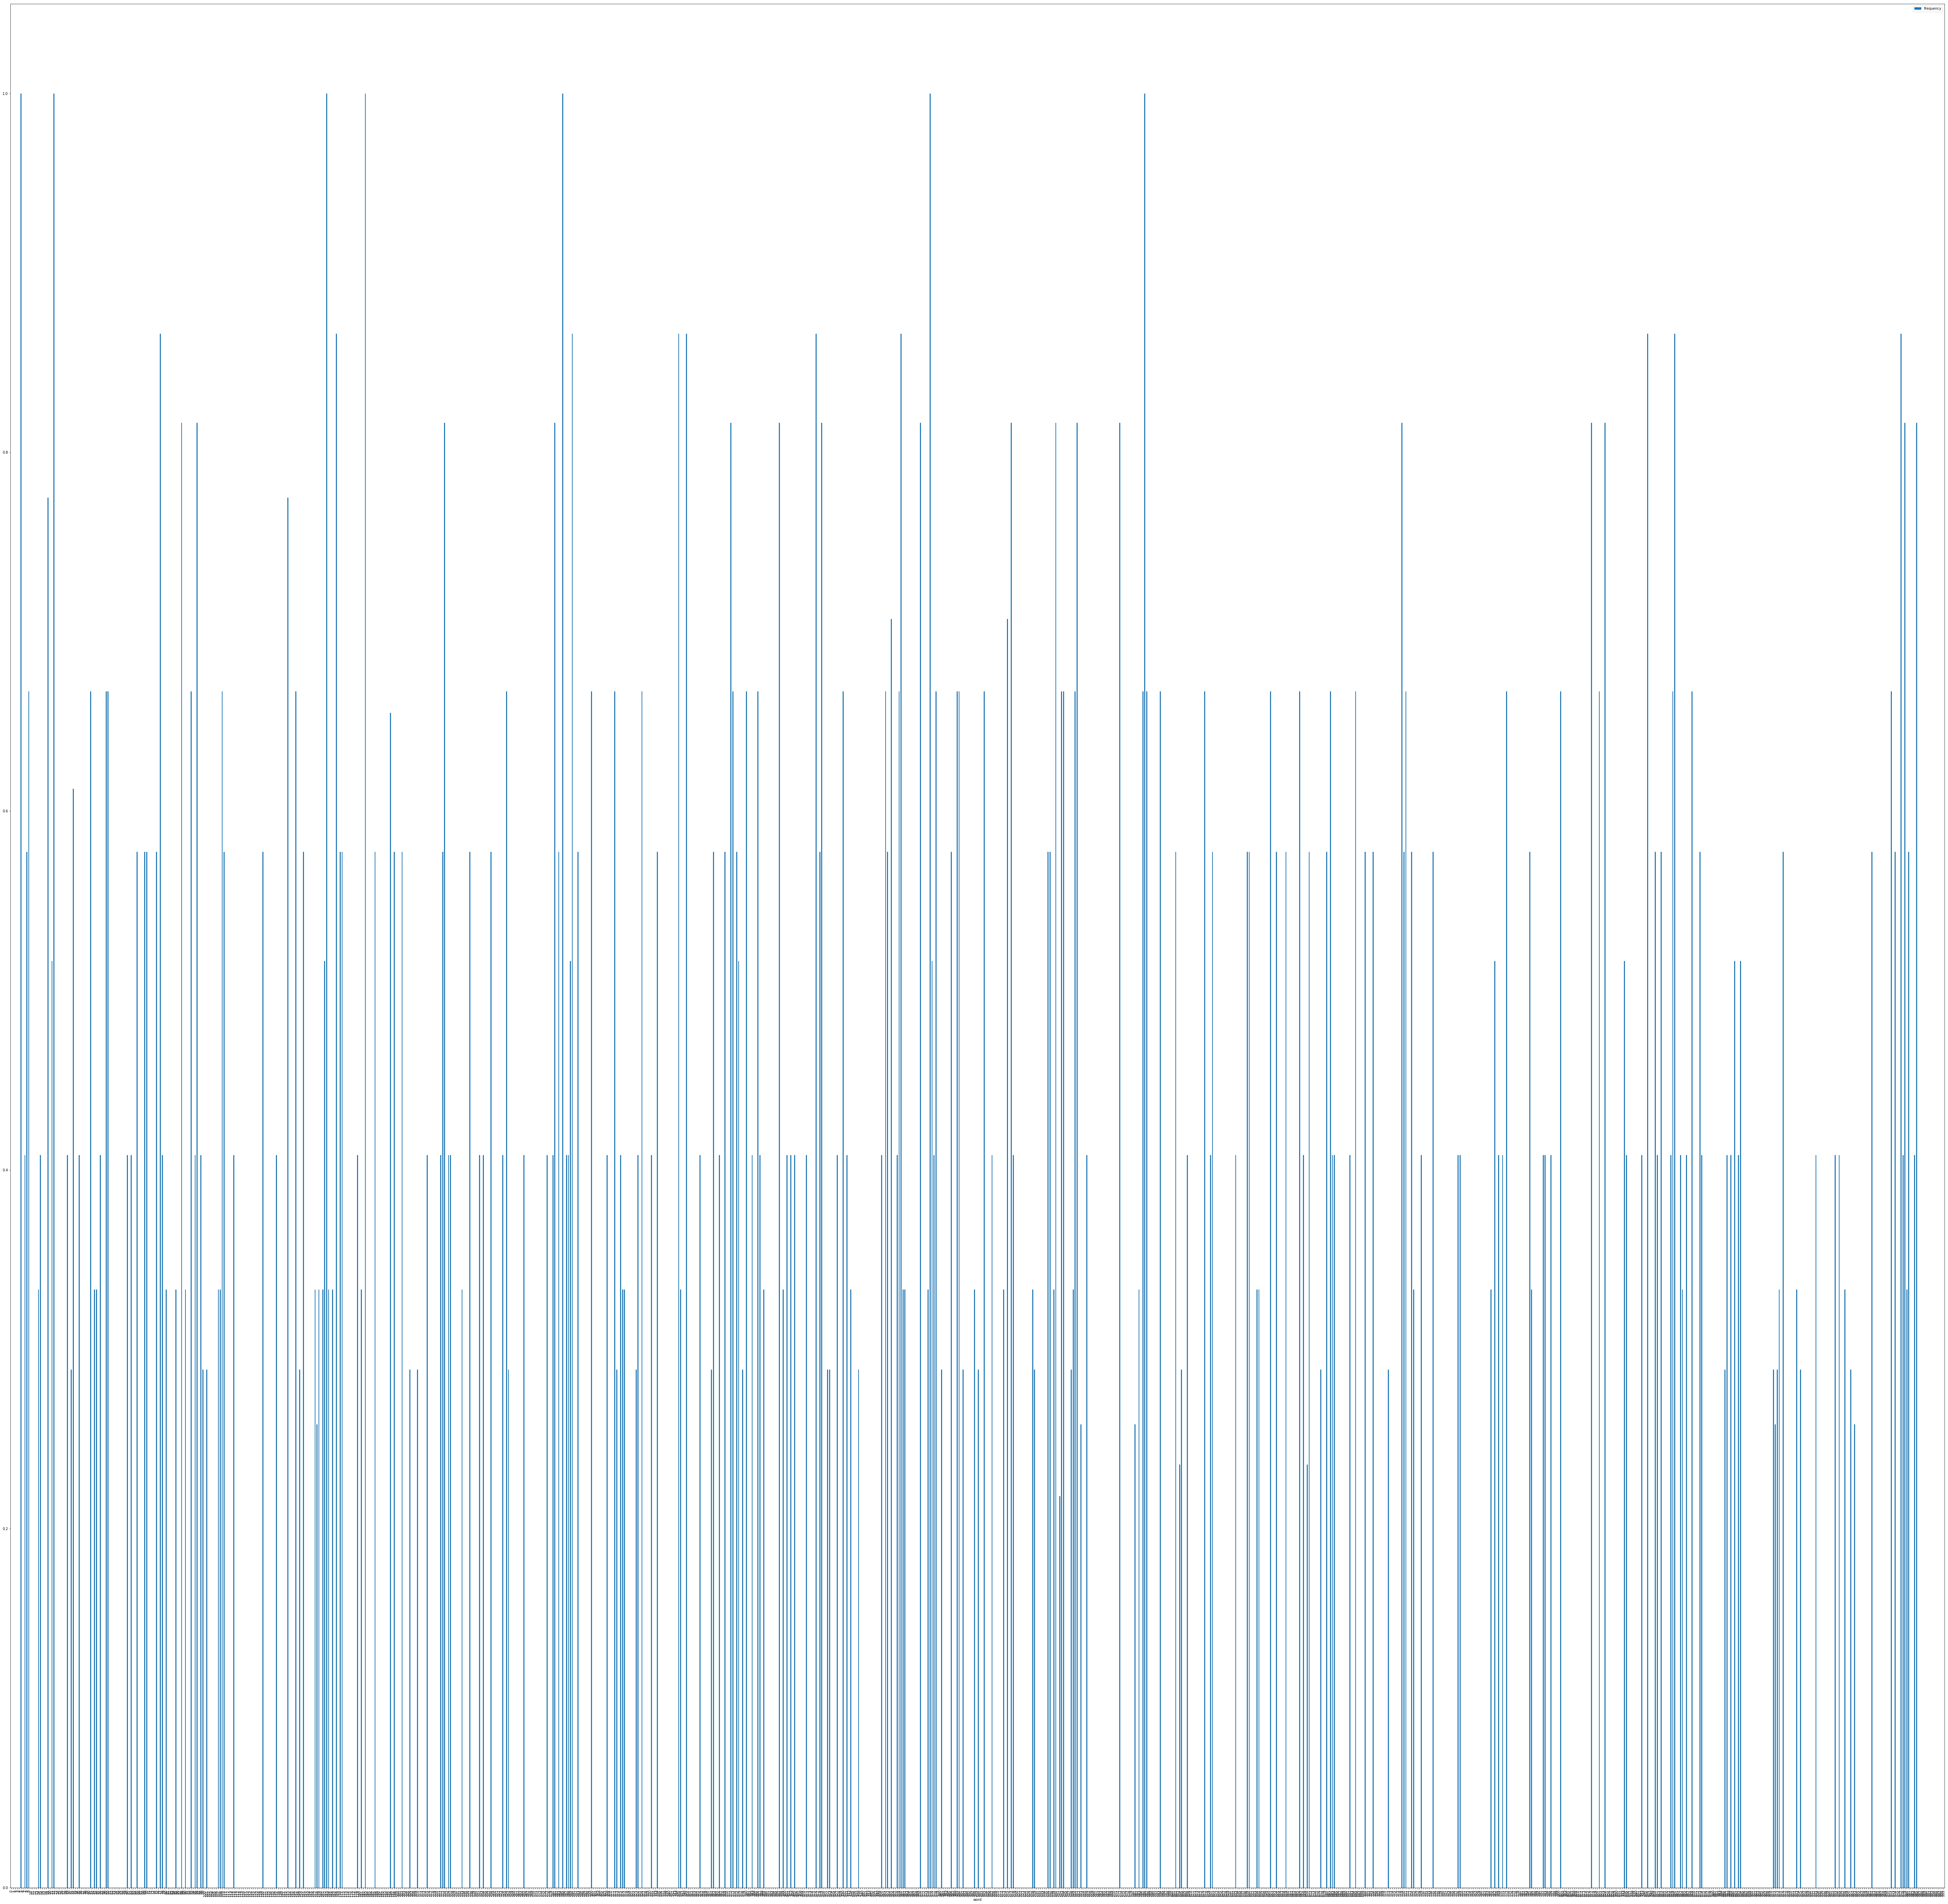

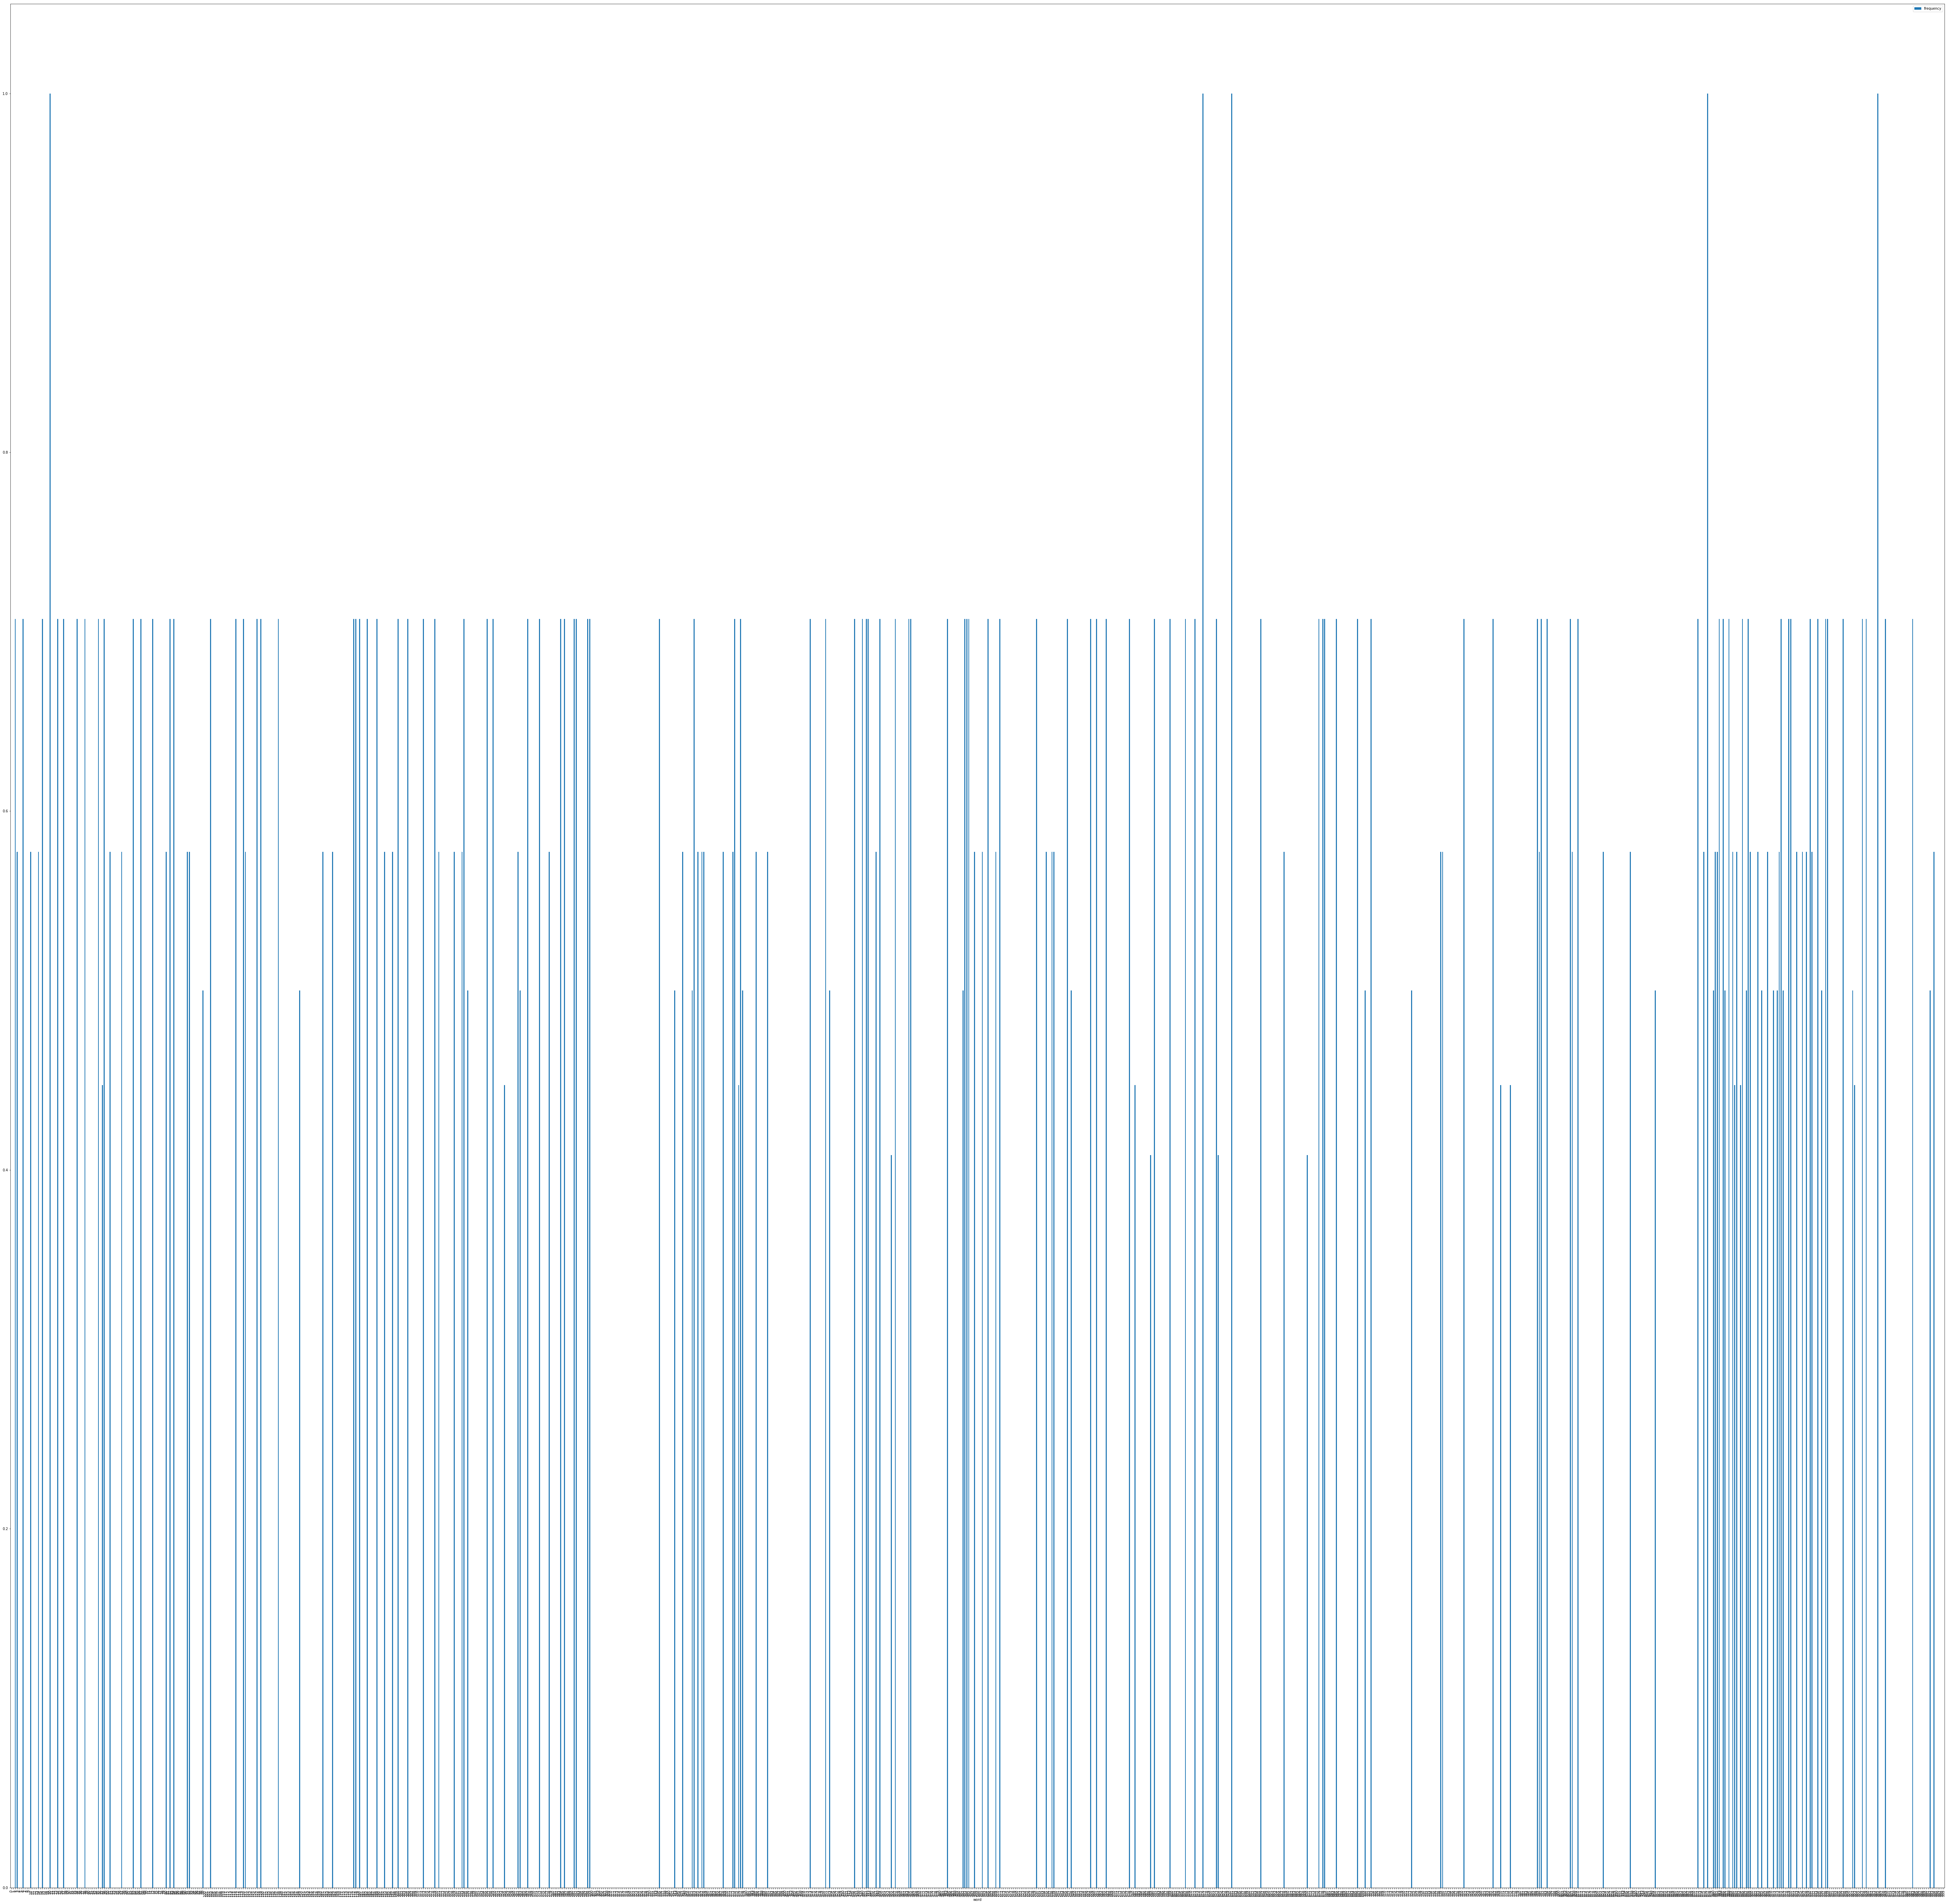

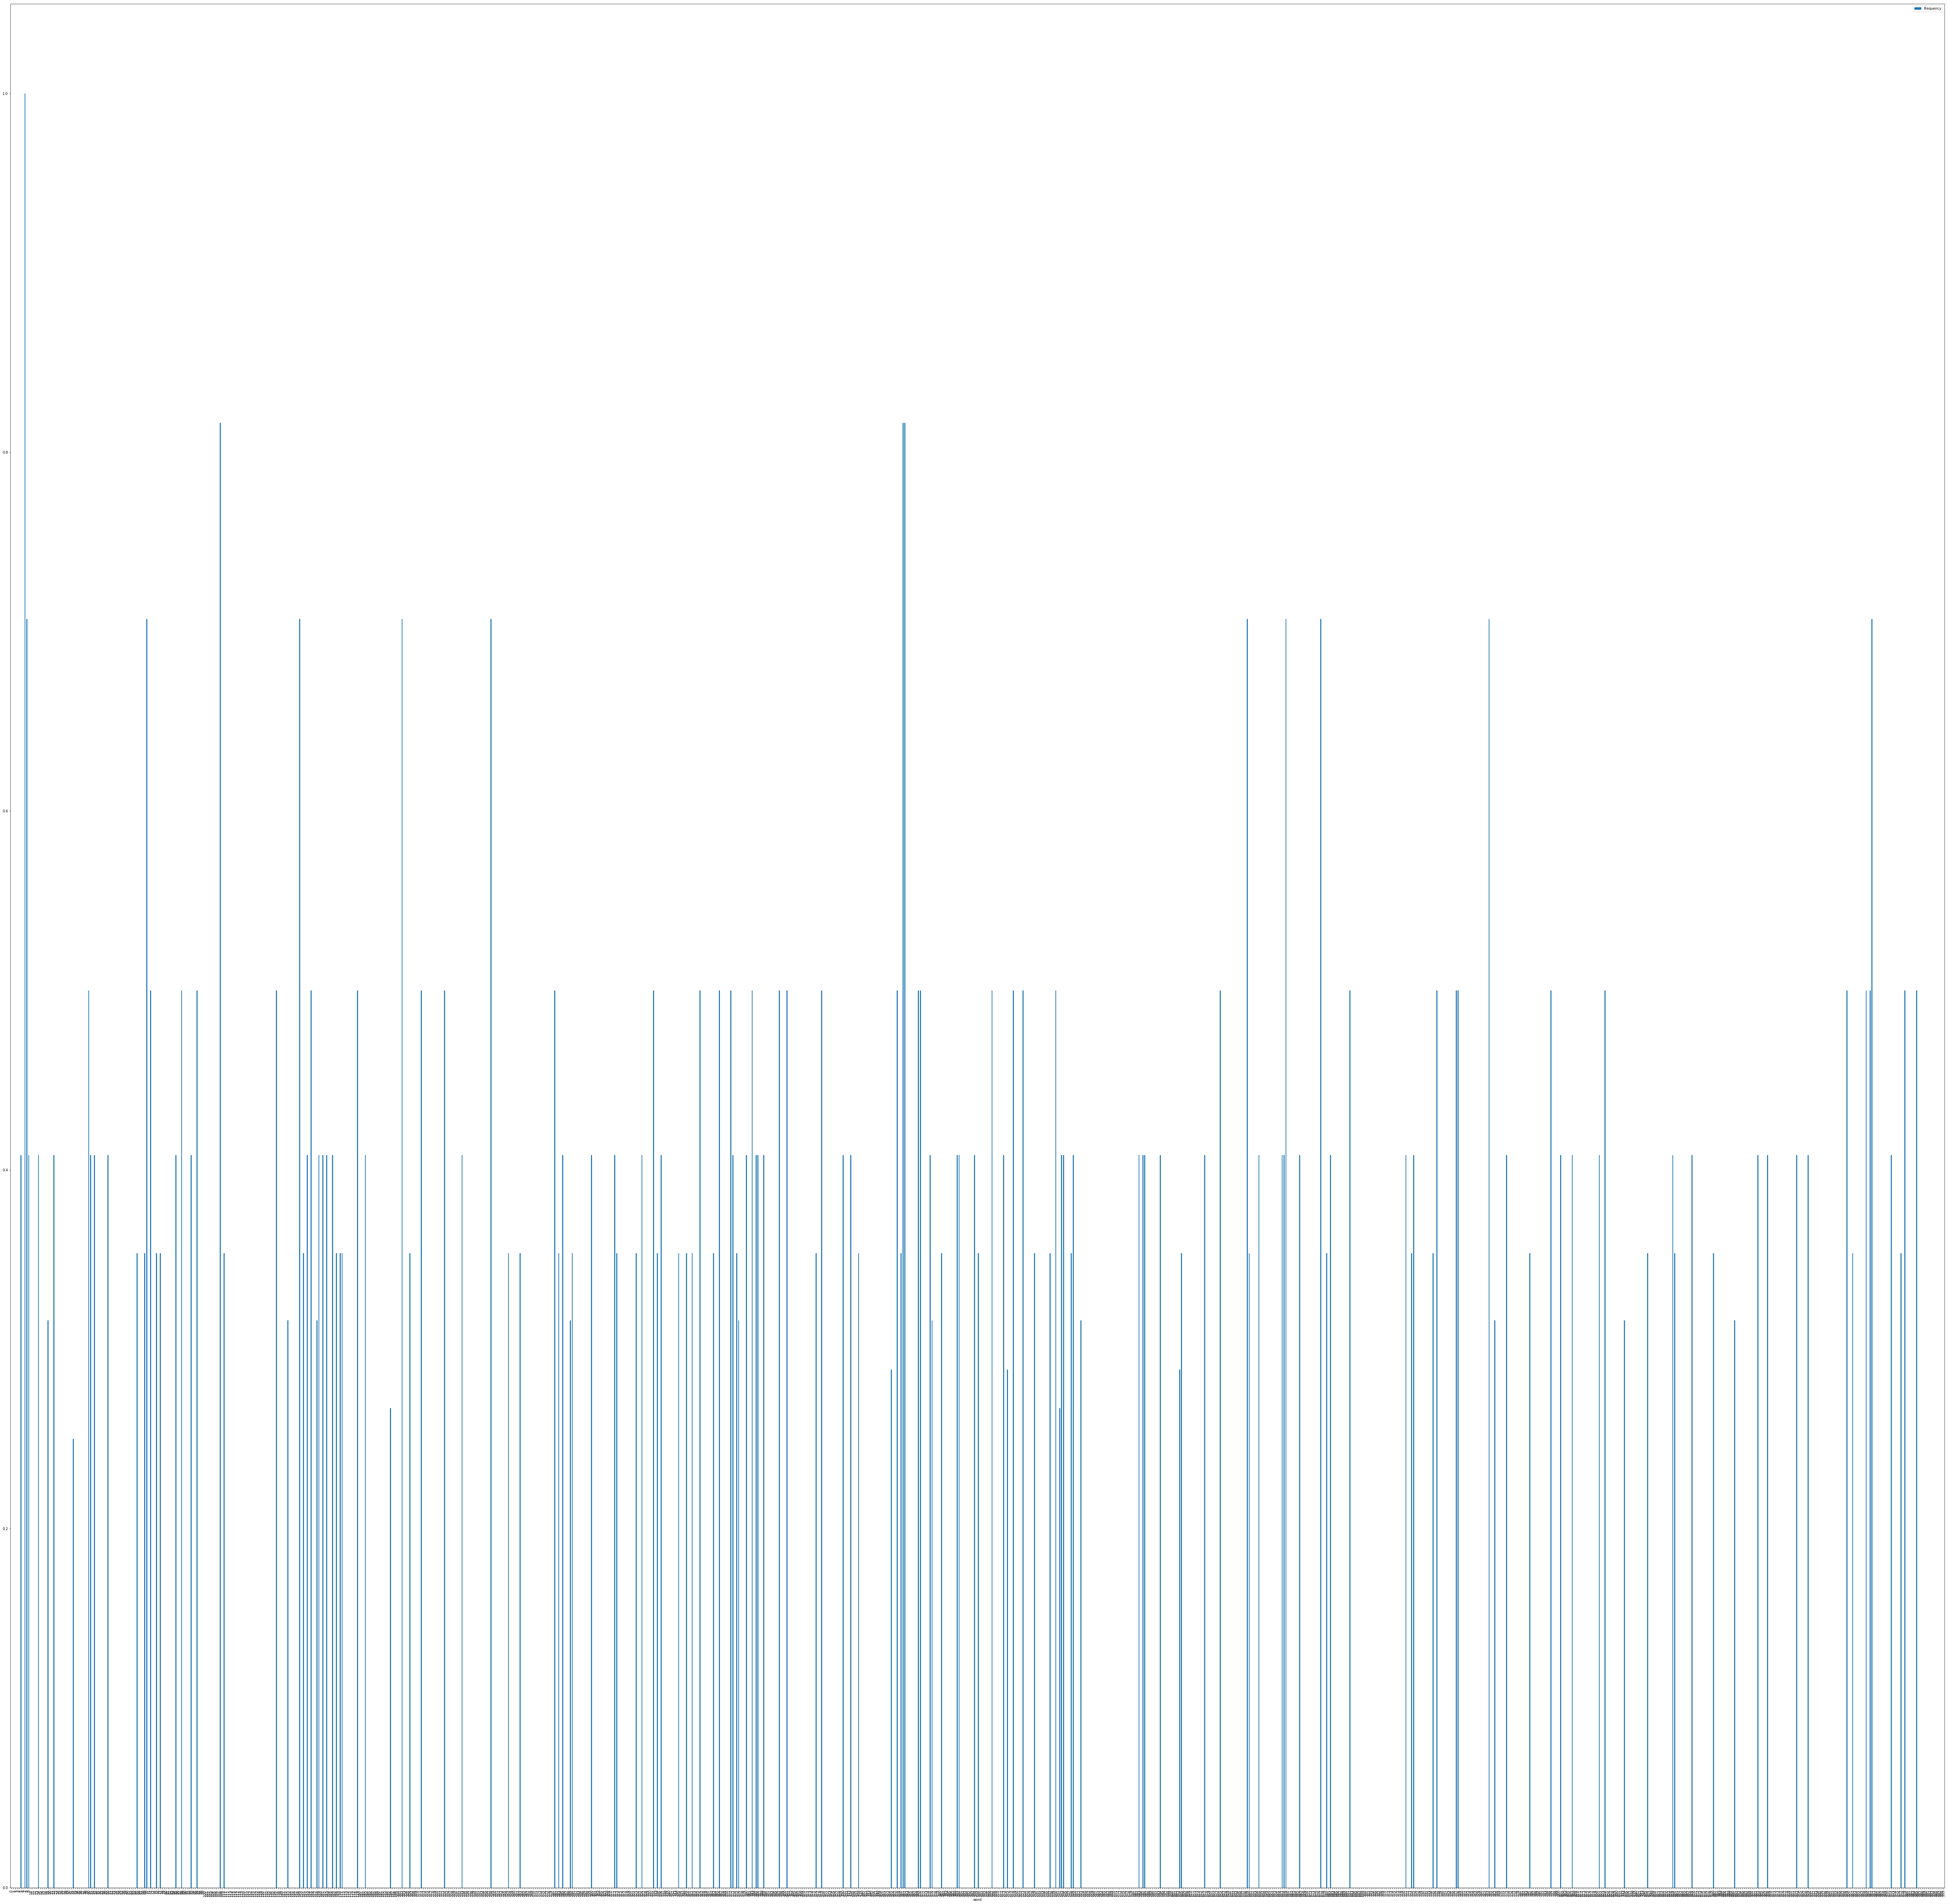

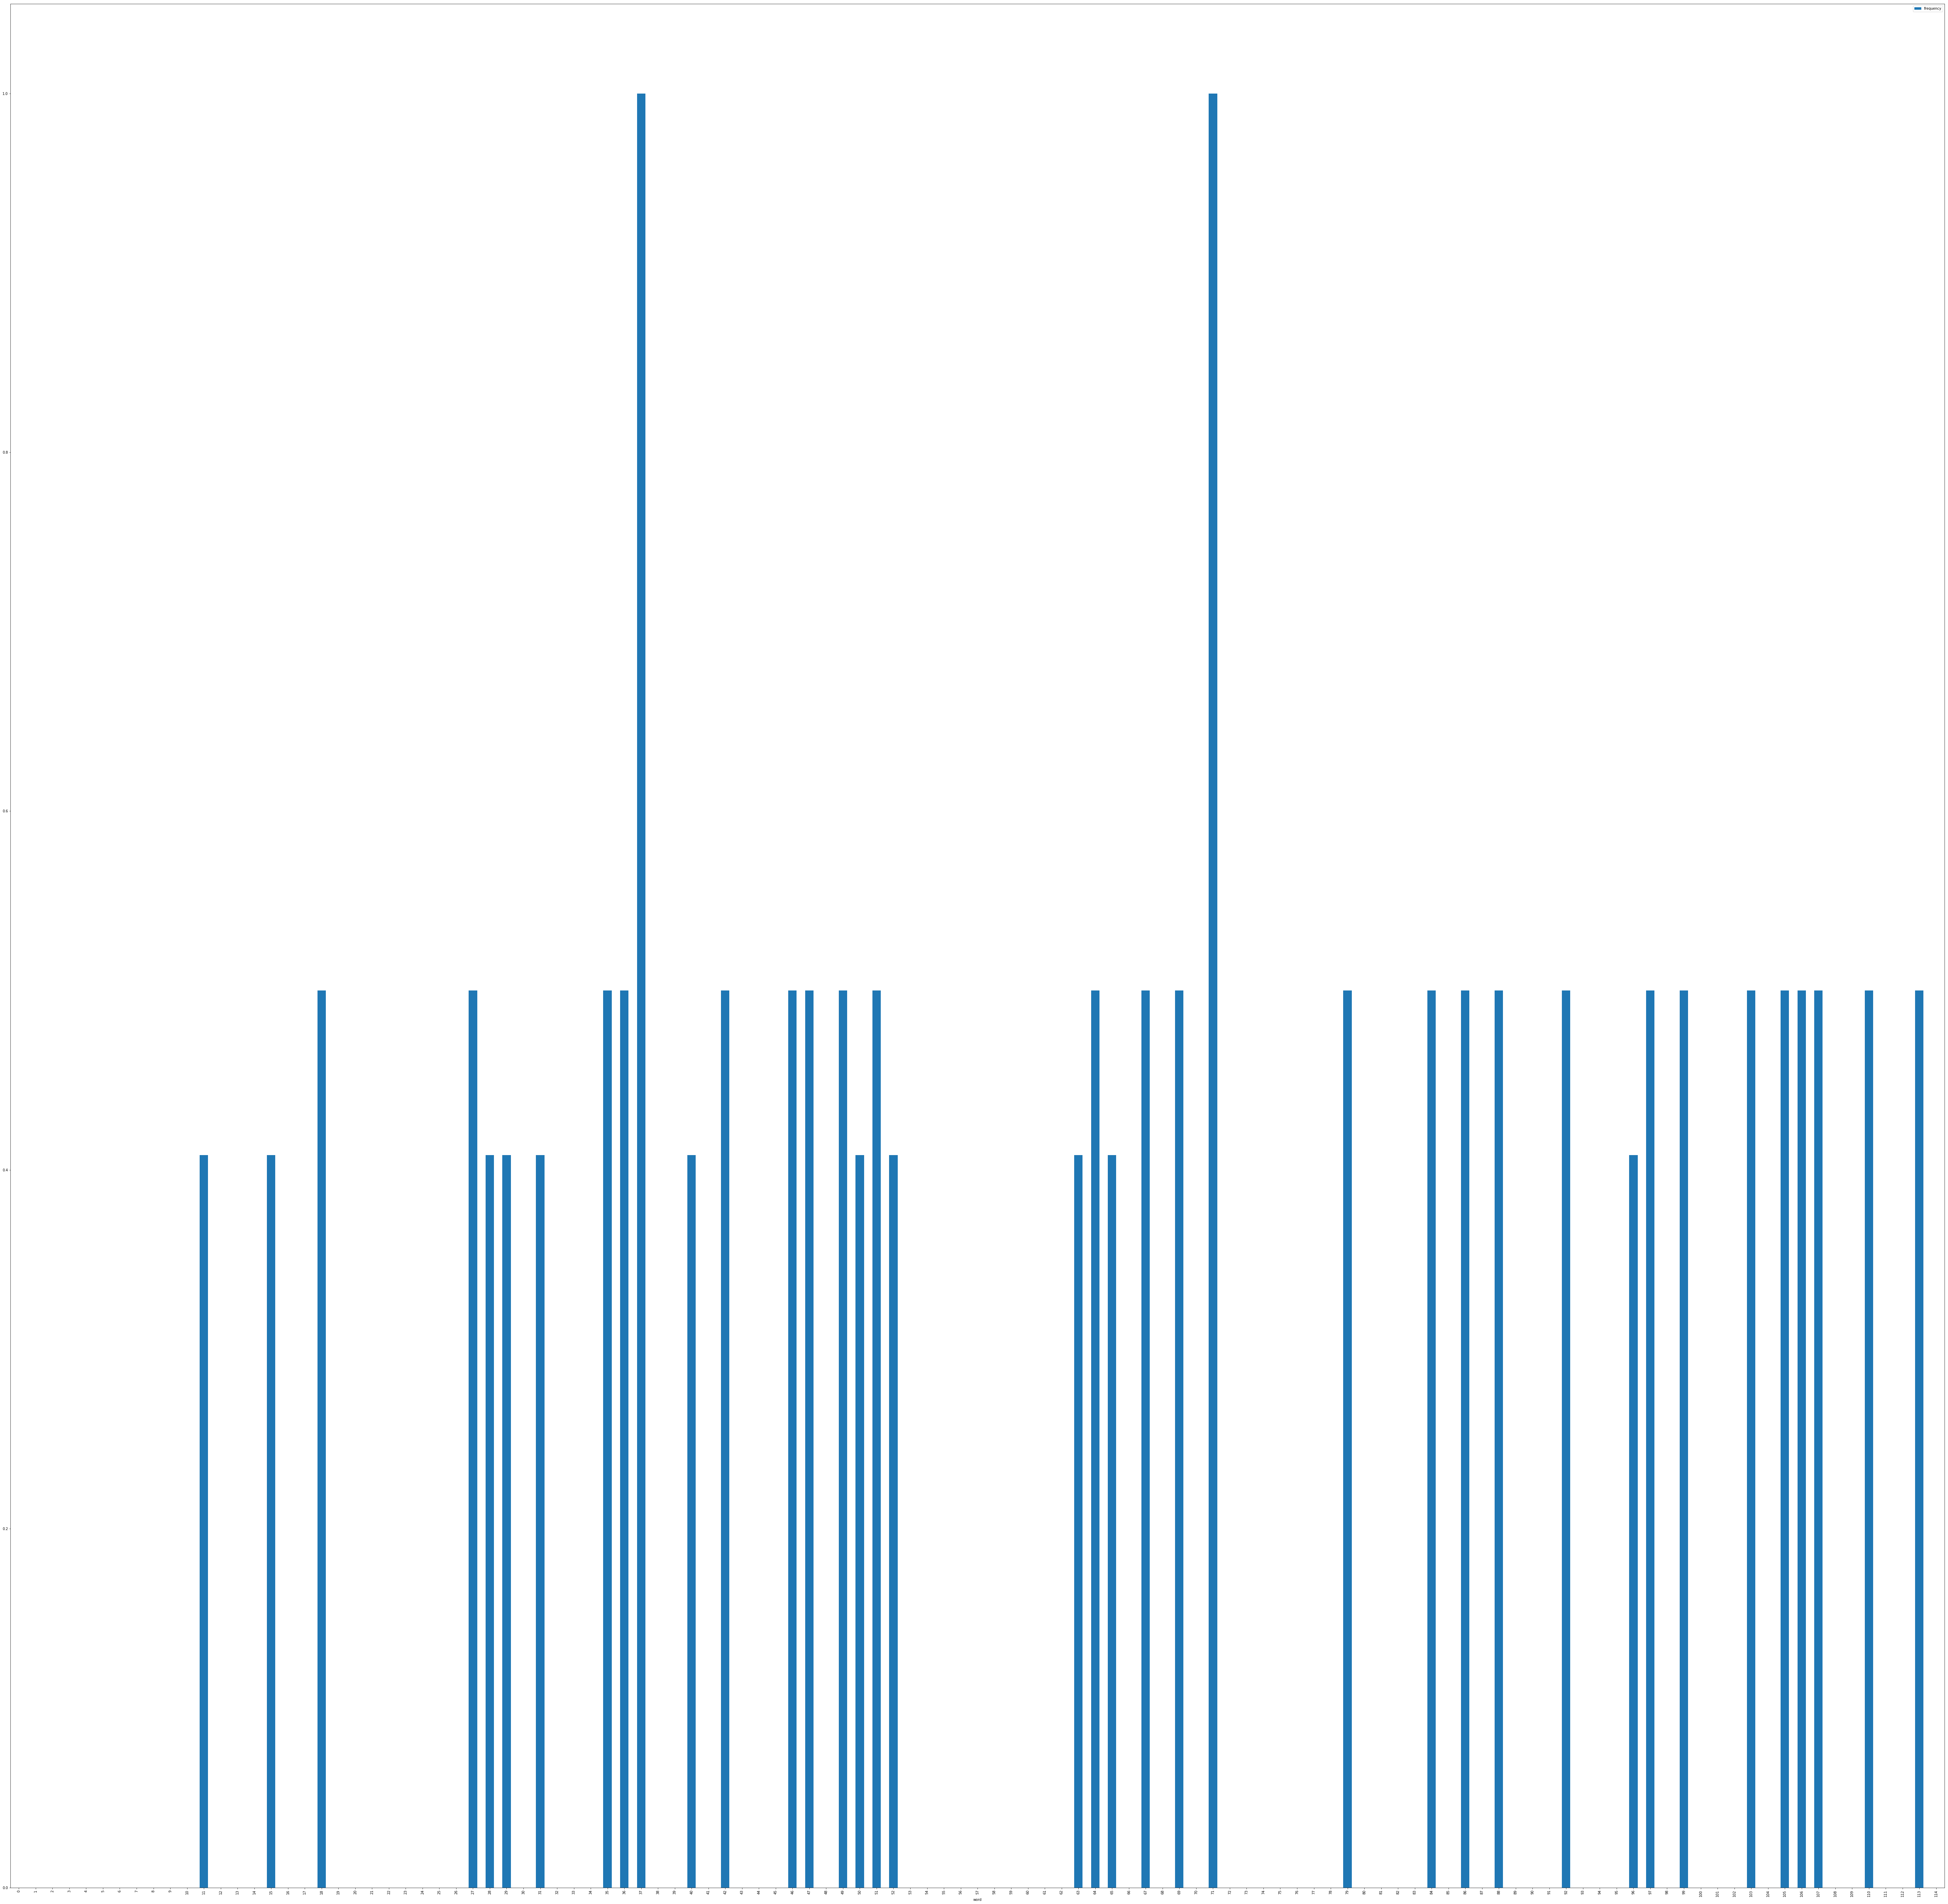

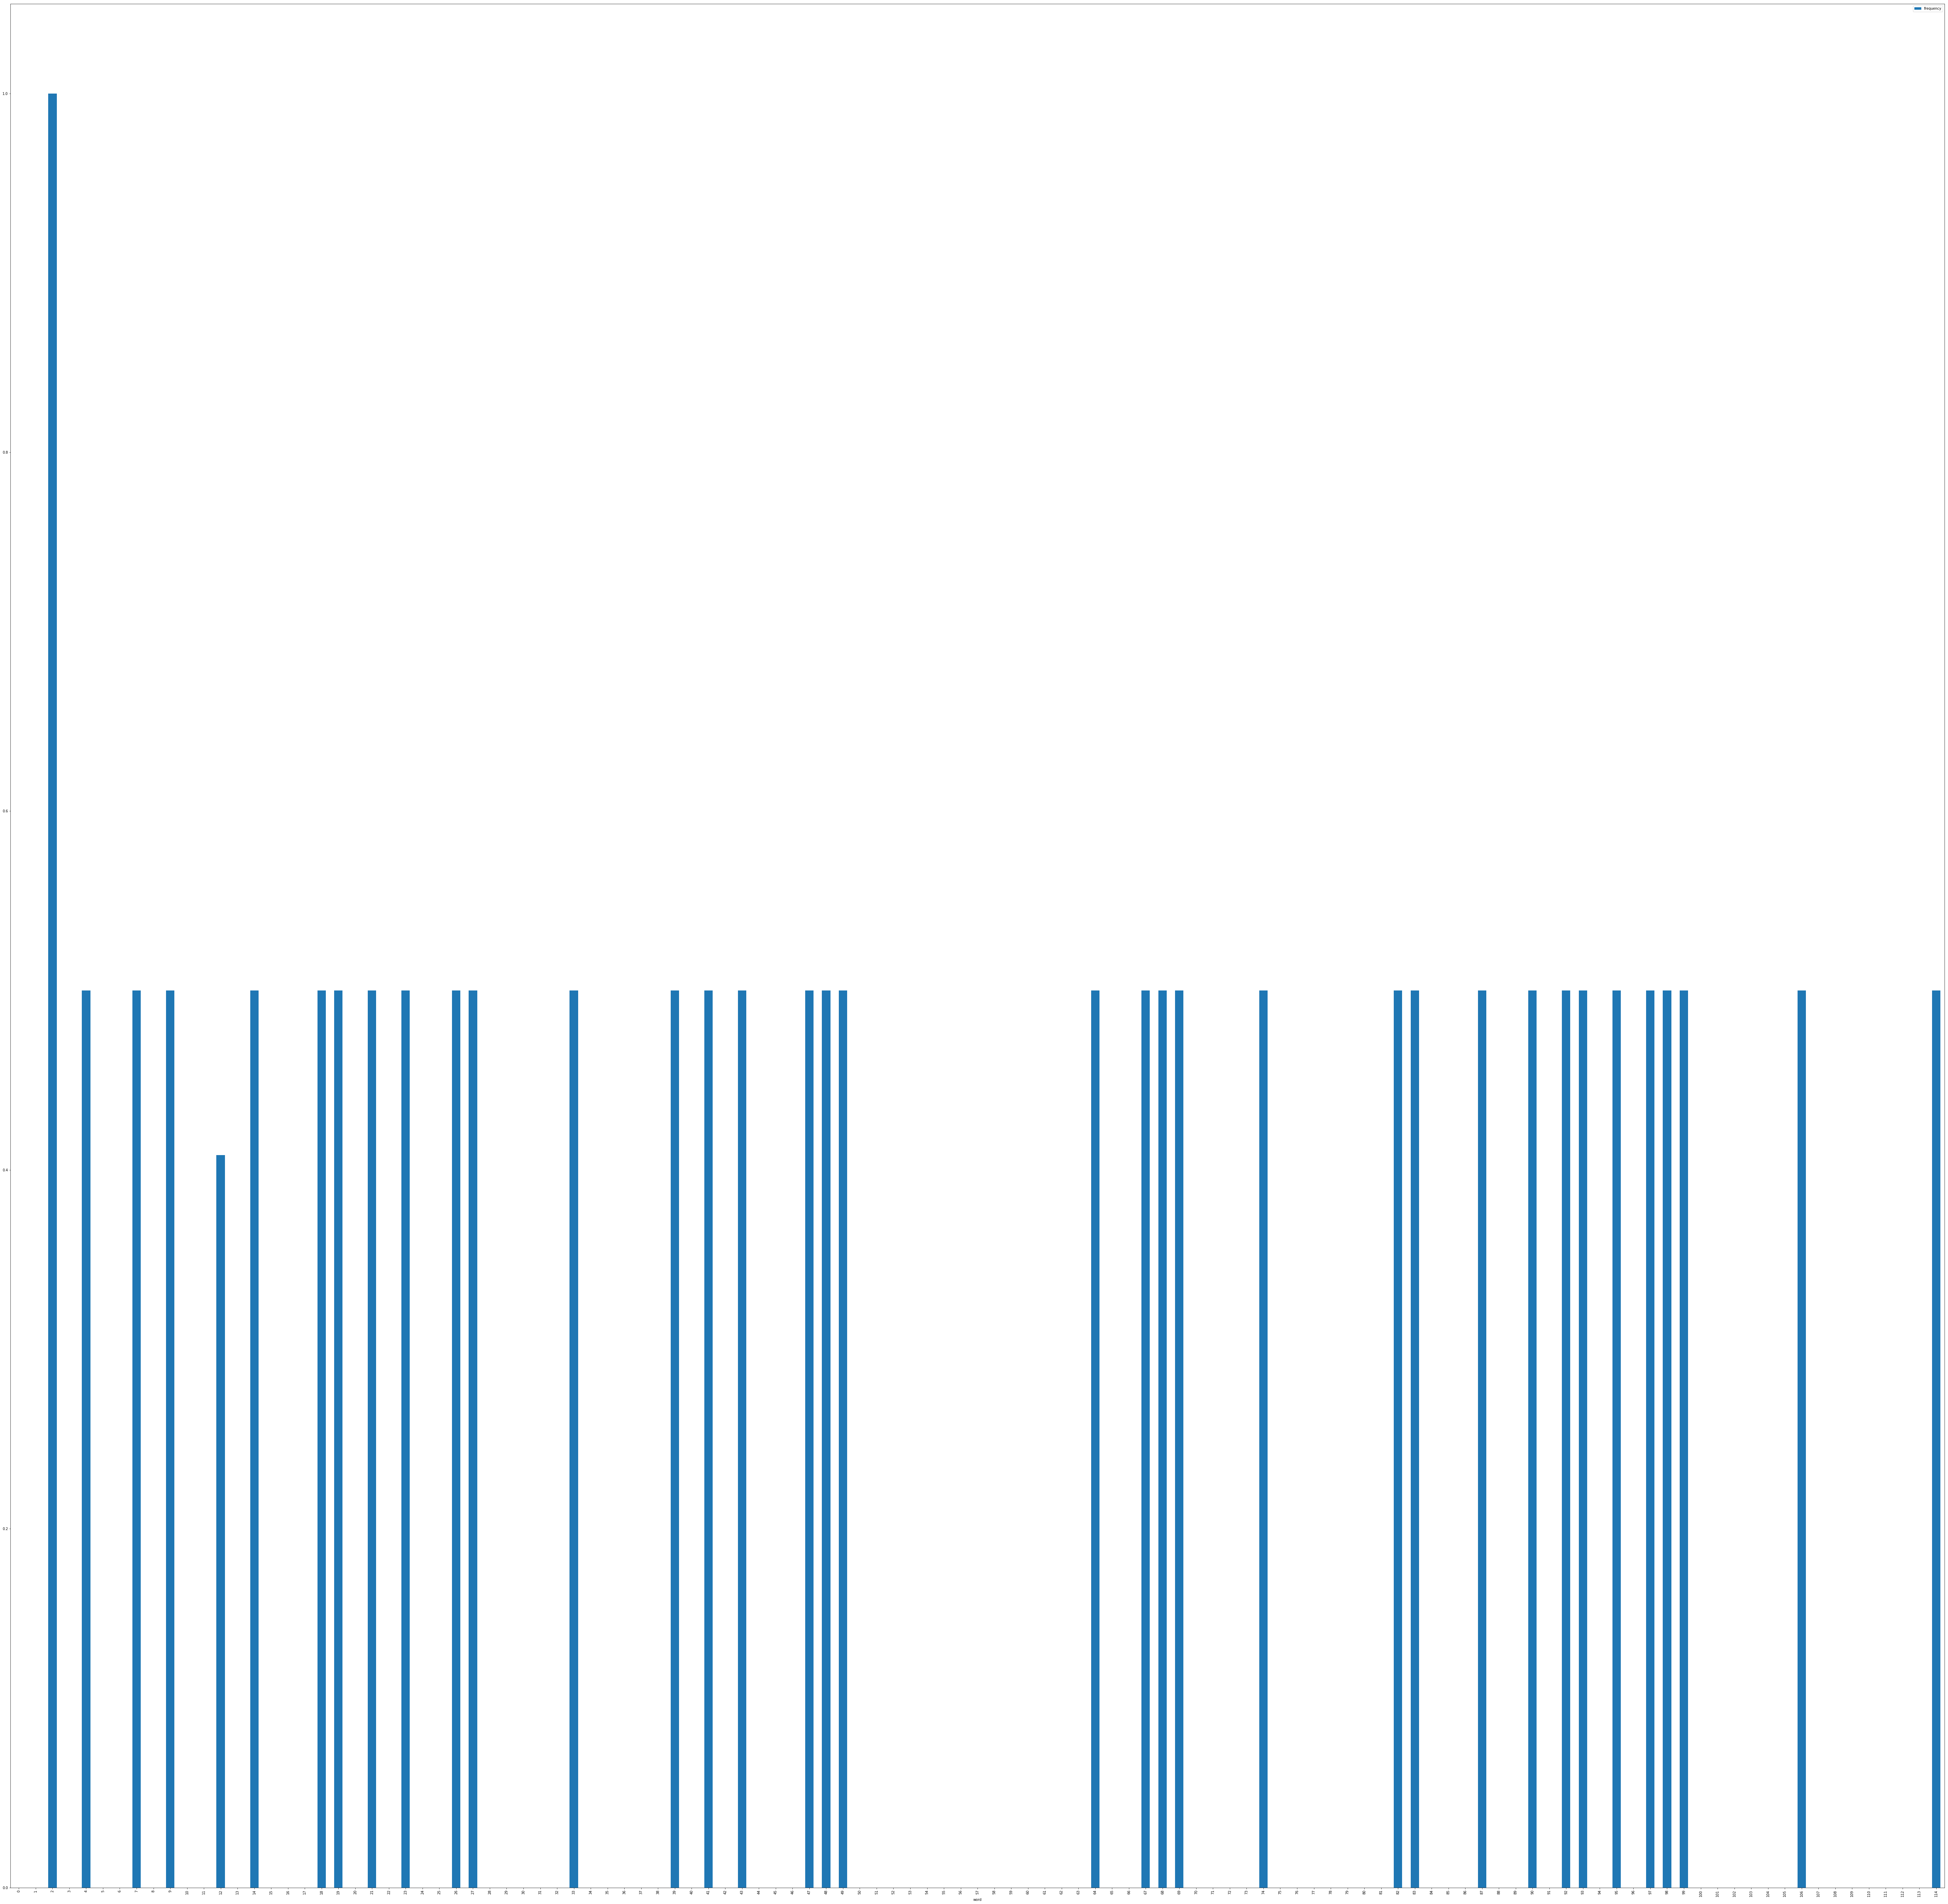

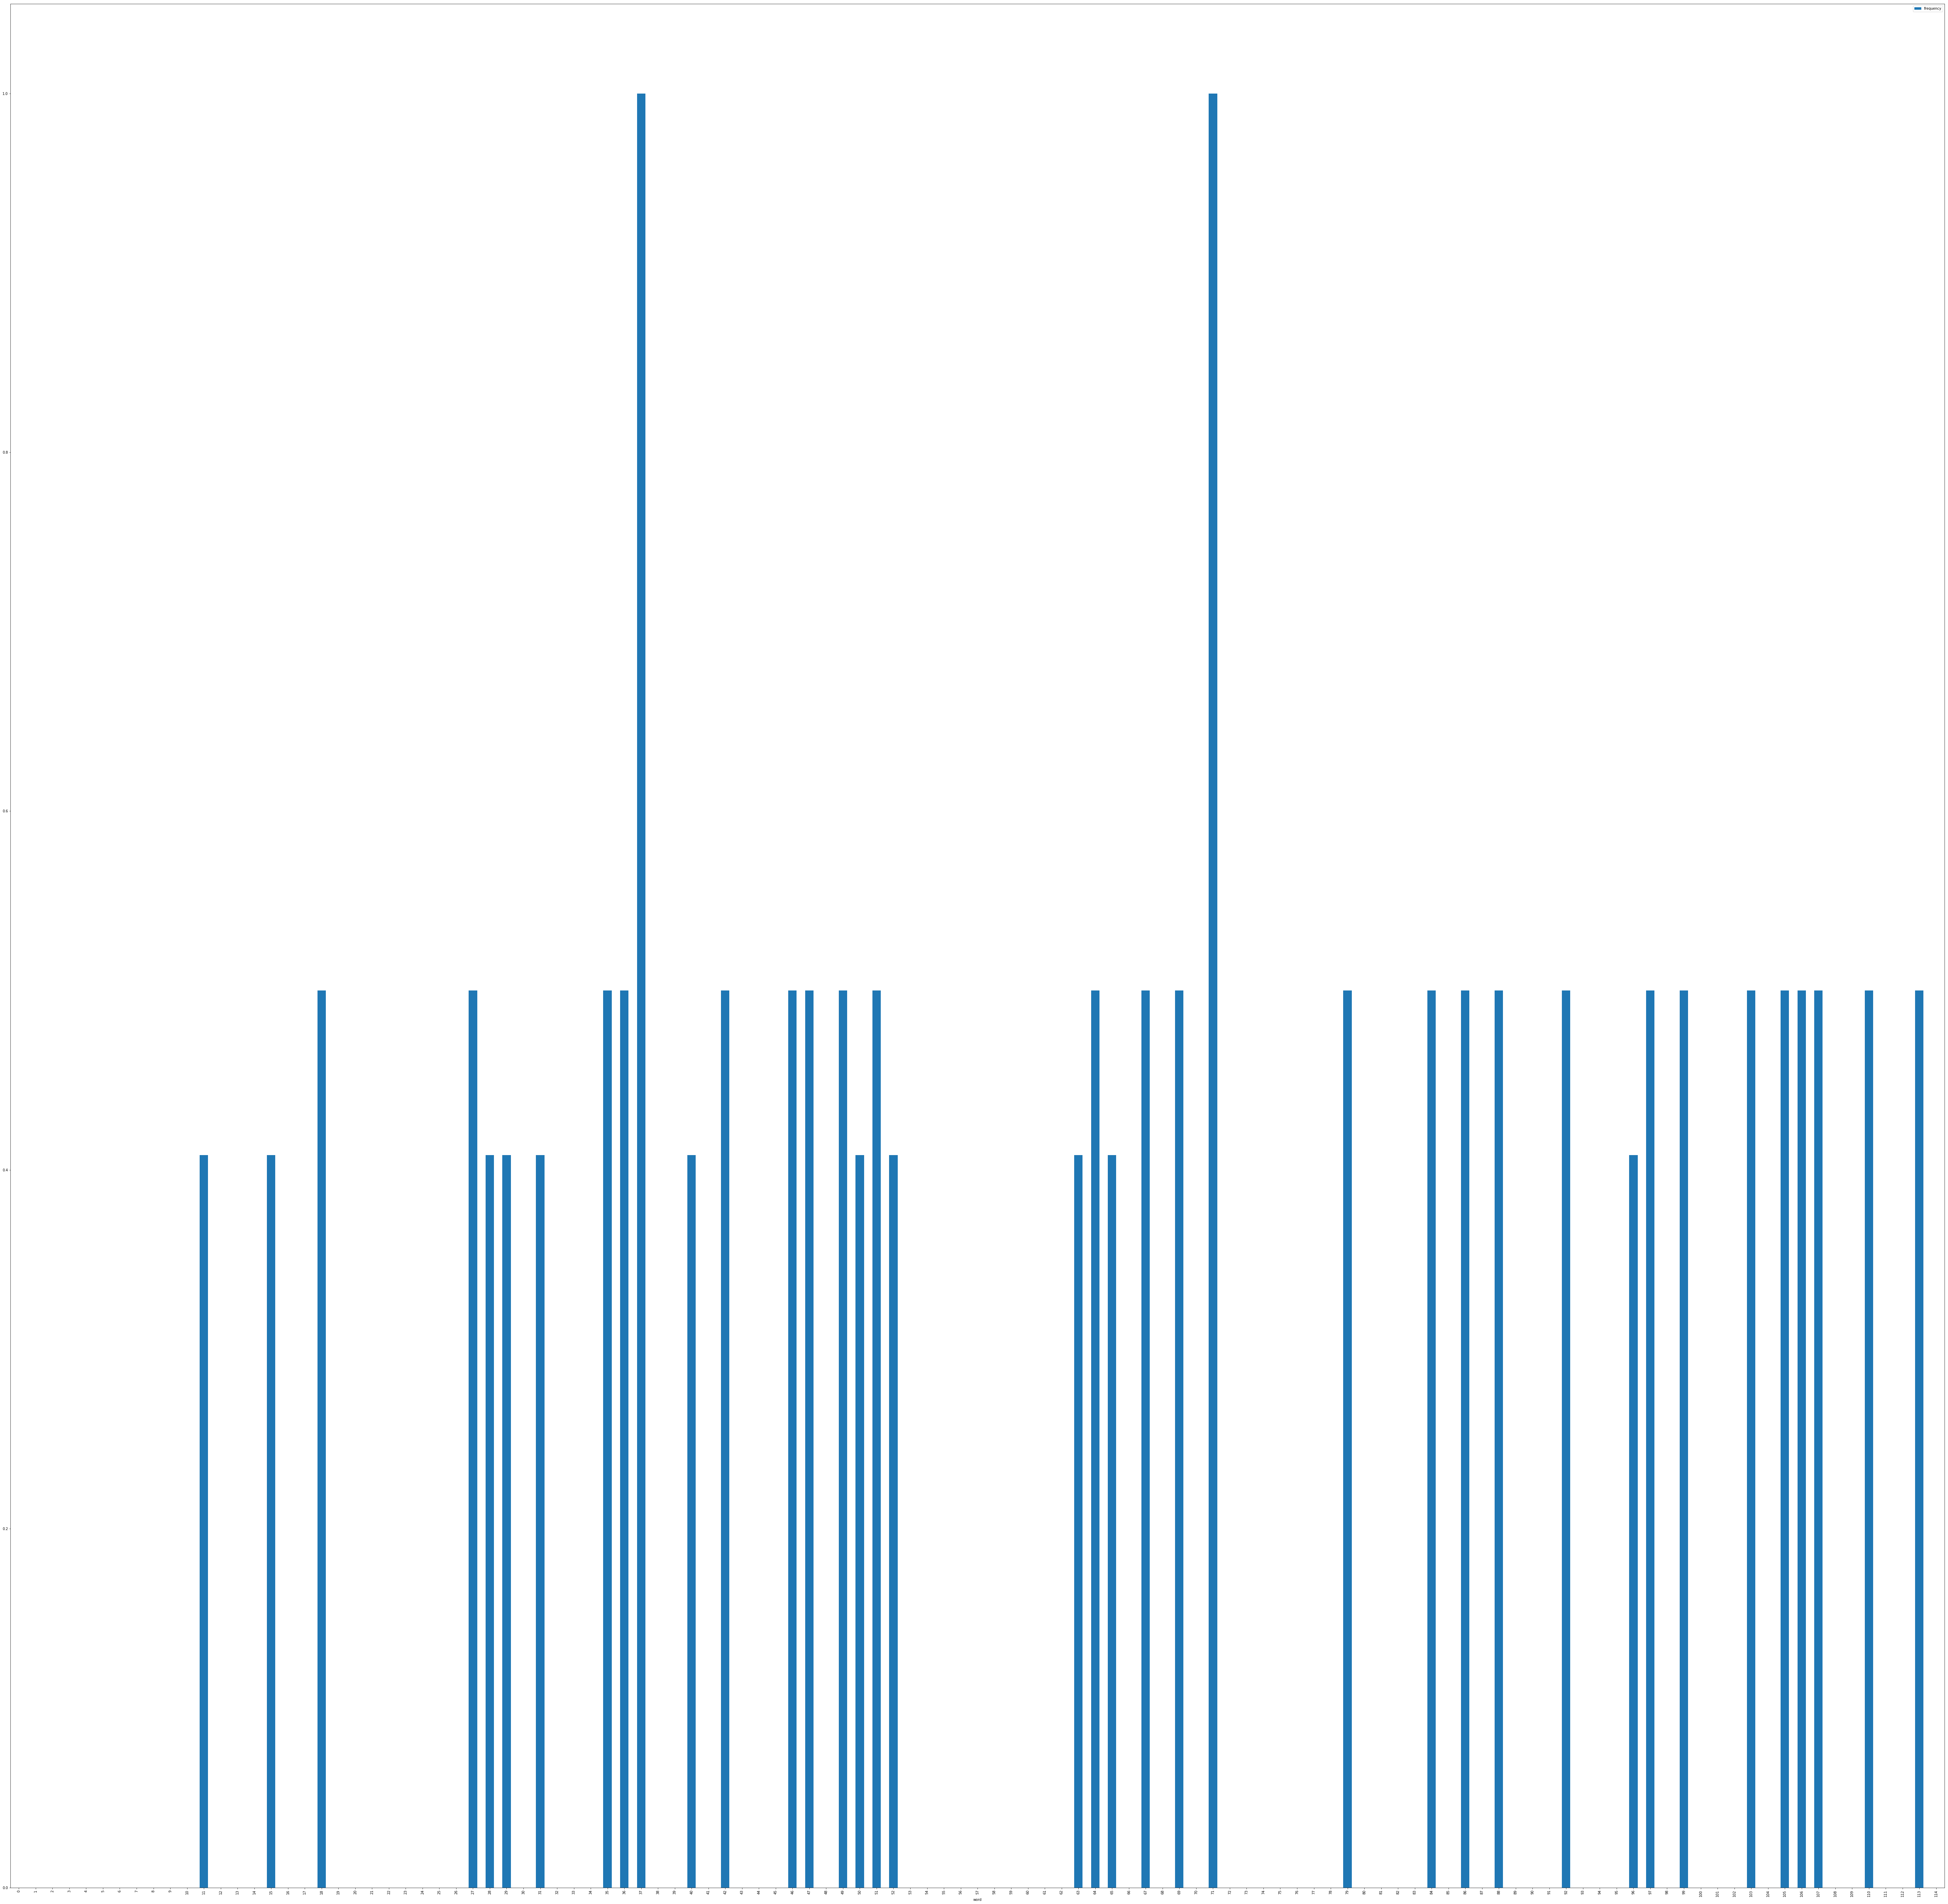

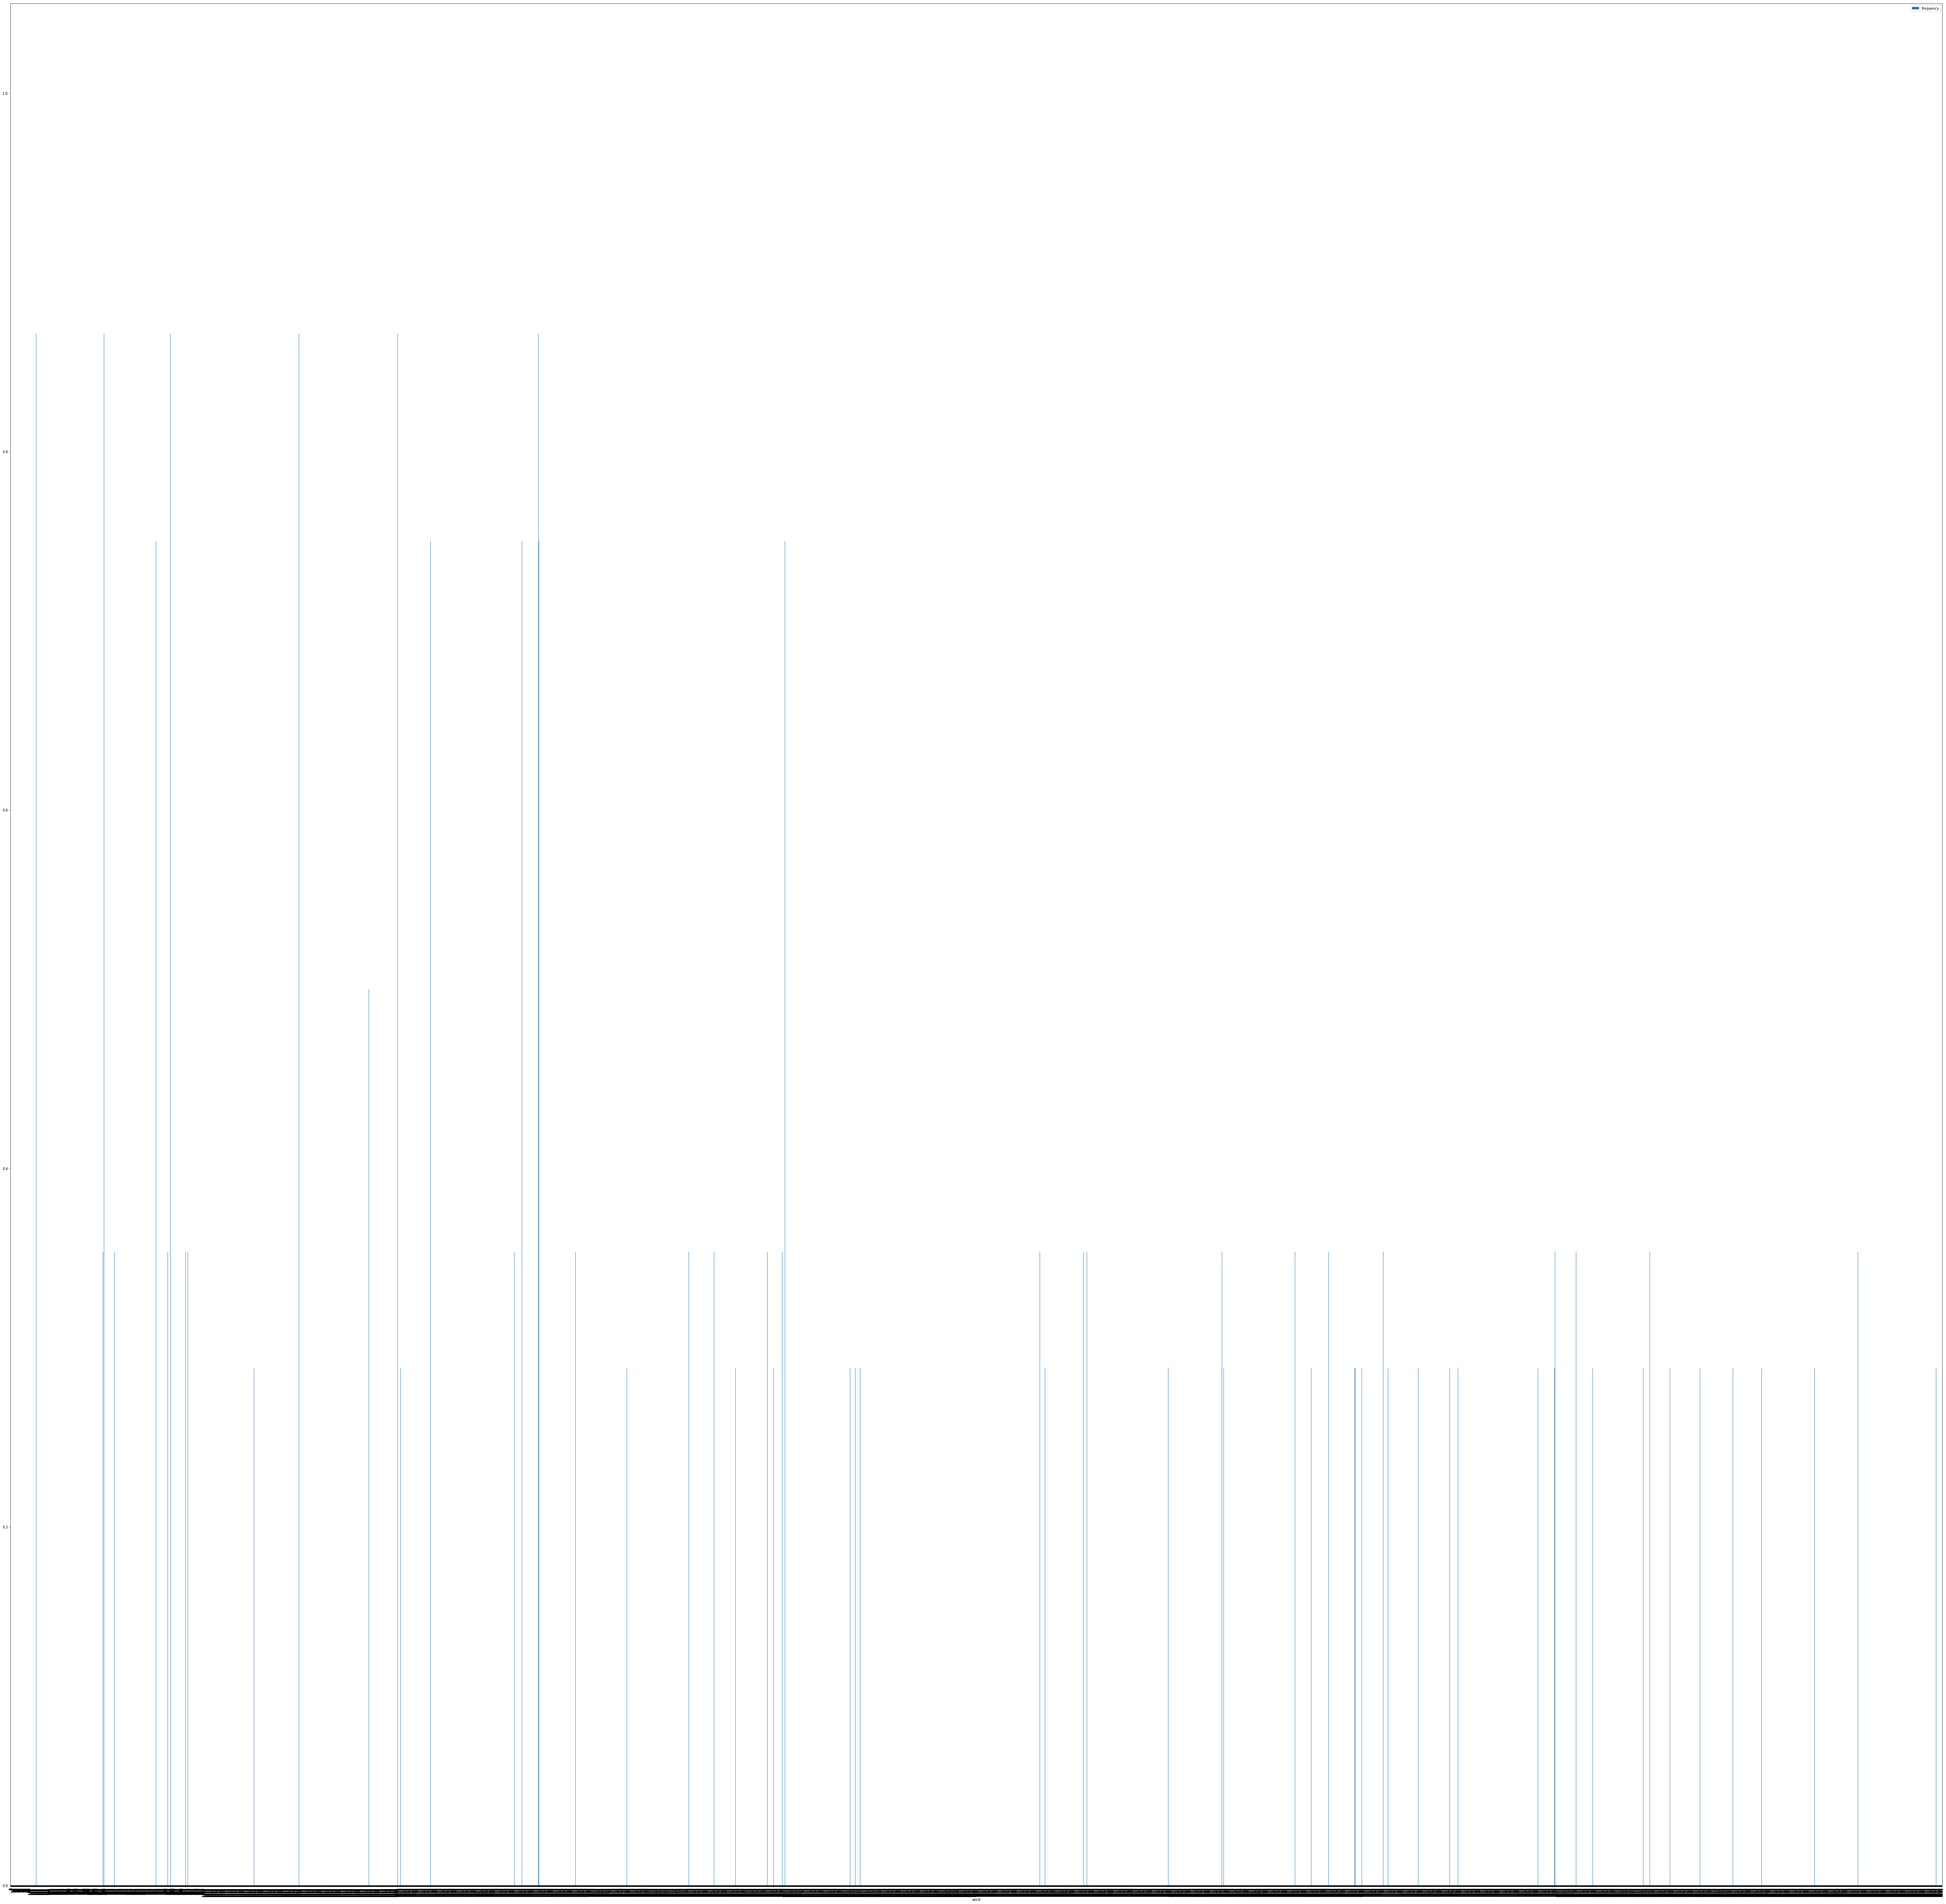

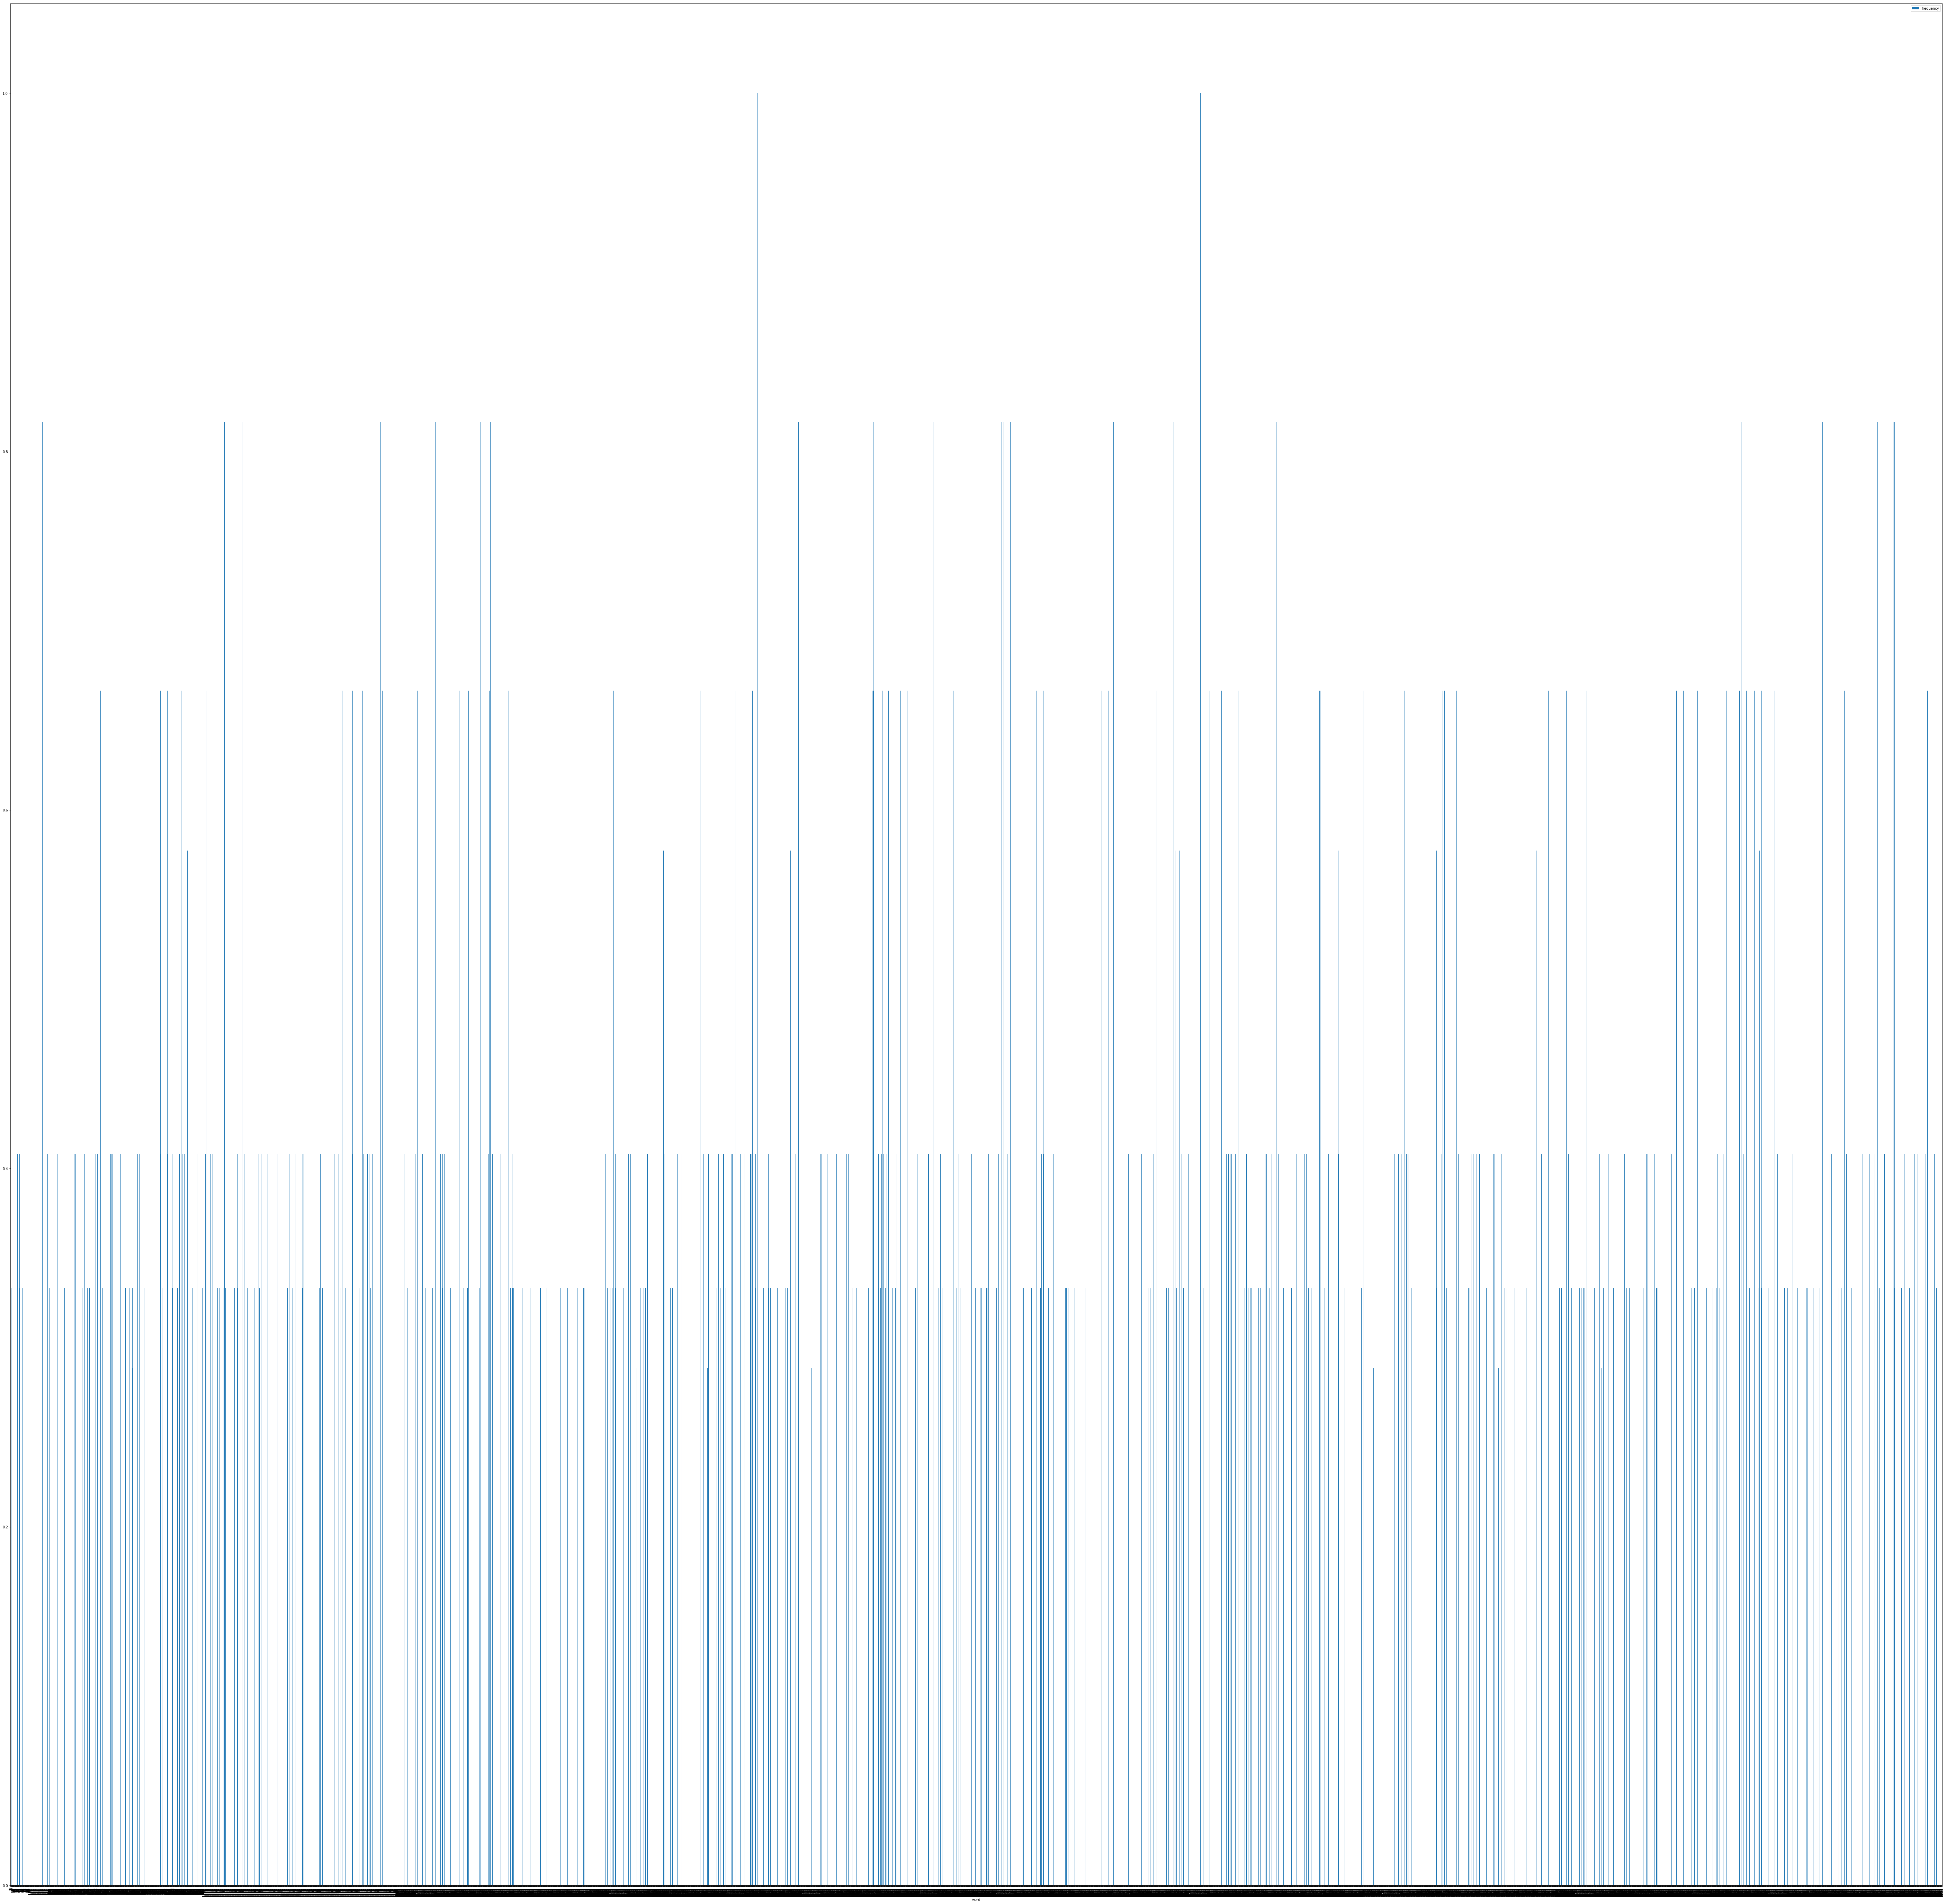

In [9]:
# for better demonstration data has been already extraction 


#button for textbox
print("Click button to get recommendations")



button=widgets.Button(description="Get Recommendations",button_style='success')
display(button)

def handle_idsubmit(sender):
    
    getRecommendations()
    
button.on_click(handle_idsubmit)

